<a href="https://colab.research.google.com/github/shivank9199/Prediction-of-resistance-mutation-in-SARS-CoV-2-against-Sotrovimab-using-machine-learning/blob/main/UG_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [ ]:
import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=882bfb4c70dd526d4b2a774fb24913b5ad1df32a75a66

In [ ]:
data_1 = pd.read_csv("/content/scores-Sotrovimab.csv")

In [ ]:
data_2 = pd.read_csv("/content/prodigydata.csv")

In [ ]:
data_2.head(10)

,S.no,No. of intermolecular contacts,No. of charged-charged contacts,No. of charged-polar contacts,No. of charged-apolar contacts,No. of polar-polar contacts,No. of apolar-polar contacts,No. of apolar-apolar contacts,Percentage of apolar NIS residues,Percentage of charged NIS residues,Predicted binding affinity(kcal.mol-1),Predicted dissociation constant(M) at 25.0˚C
0,0,60,5,8,14,6,15,12,36.33,20.67,-10.40,2.300000e-08
1,1,60,5,8,14,6,15,12,36.00,21.00,-10.50,2.300000e-08
2,2,60,5,8,14,6,15,12,36.00,20.67,-10.60,2.100000e-08
3,3,60,5,8,14,6,15,12,36.33,20.67,-10.70,2.300000e-08
4,4,60,5,8,14,6,15,12,36.00,21.00,-10.80,2.300000e-08
5,5,60,5,8,14,6,15,12,36.33,20.67,-10.90,2.300000e-08
6,6,60,5,8,14,6,15,12,36.33,20.67,-10.10,2.300000e-08
7,7,60,5,8,14,6,15,12,36.00,20.67,-10.11,2.100000e-08
8,8,60,5,8,14,6,15,12,36.00,20.67,-10.12,2.100000e-08
9,9,60,5,8,14,6,15,12,36.33,20.67,-10.13,2.300000e-08


In [ ]:
data_1.head(10)

,mutation,Affinity,dAffinity,Stability,dStability
0,4:T345T,-84.044703,0.000000,-1513.542445,0.000000
1,4:T345A,-83.156100,0.888604,-1512.728823,0.813622
2,4:T345R,-87.734406,-3.689703,-1512.529630,1.012815
3,4:T345N,-87.738216,-3.693513,-1512.655783,0.886662
4,4:T345I,-85.483365,-1.438662,-1513.510484,0.031961
5,4:T345K,-85.820716,-1.776013,-1512.292113,1.250332
6,4:T345M,-87.587517,-3.542814,-1512.842204,0.700241
7,4:T345P,-83.060639,0.984065,-1512.253330,1.289115
8,4:T345S,-84.618053,-0.573350,-1512.663397,0.879049
9,4:R346R,-87.715519,0.000000,-1503.429366,0.000000


In [ ]:
data = data_1.merge(data_2, left_index=True, right_index=True)

In [ ]:
data.head(10)

,mutation,Affinity,dAffinity,Stability,dStability,S.no,No. of intermolecular contacts,No. of charged-charged contacts,No. of charged-polar contacts,No. of charged-apolar contacts,No. of polar-polar contacts,No. of apolar-polar contacts,No. of apolar-apolar contacts,Percentage of apolar NIS residues,Percentage of charged NIS residues,Predicted binding affinity(kcal.mol-1),Predicted dissociation constant(M) at 25.0˚C
0,4:I332I,-77.450494,0.000000,-519.496314,0.000000,0,60,5,8,14,6,15,12,36.33,20.67,-10.40,2.300000e-08
1,4:I332R,-76.571197,0.879297,-518.859181,0.637133,1,60,5,8,14,6,15,12,36.00,21.00,-10.50,2.300000e-08
2,4:I332N,-77.456925,-0.006431,-517.547612,1.948702,2,60,5,8,14,6,15,12,36.00,20.67,-10.60,2.100000e-08
3,4:I332L,-77.449147,0.001347,-518.885106,0.611208,3,60,5,8,14,6,15,12,36.33,20.67,-10.70,2.300000e-08
4,4:I332K,-76.690015,0.760479,-517.399535,2.096779,4,60,5,8,14,6,15,12,36.00,21.00,-10.80,2.300000e-08
5,4:I332M,-77.379605,0.070889,-517.821948,1.674366,5,60,5,8,14,6,15,12,36.33,20.67,-10.90,2.300000e-08
6,4:I332F,-77.288404,0.162090,-518.604016,0.892298,6,60,5,8,14,6,15,12,36.33,20.67,-10.10,2.300000e-08
7,4:I332S,-77.730083,-0.279589,-517.375218,2.121096,7,60,5,8,14,6,15,12,36.00,20.67,-10.11,2.100000e-08
8,4:I332T,-77.543593,-0.093099,-517.325952,2.170362,8,60,5,8,14,6,15,12,36.00,20.67,-10.12,2.100000e-08
9,4:I332V,-77.536574,-0.086080,-518.249656,1.246658,9,60,5,8,14,6,15,12,36.33,20.67,-10.13,2.300000e-08


In [ ]:
data = data.drop('S.no', axis=1)

In [ ]:
data.shape

(1180, 16)

In [ ]:
data.describe()

,Affinity,dAffinity,Stability,dStability,No. of intermolecular contacts,No. of charged-charged contacts,No. of charged-polar contacts,No. of charged-apolar contacts,No. of polar-polar contacts,No. of apolar-polar contacts,No. of apolar-apolar contacts,Percentage of apolar NIS residues,Percentage of charged NIS residues,Predicted binding affinity(kcal.mol-1),Predicted dissociation constant(M) at 25.0˚C
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1.180000e+03
mean,-76.662923,-0.018581,-505.495453,1.165594,60.885593,4.886441,8.025424,14.057627,6.002542,15.955932,11.957627,36.327237,20.716686,-10.481003,1.710059e-08
std,2.385250,0.755222,155.032246,1.088873,1.029487,0.406461,0.574580,0.602568,0.298416,0.610697,0.660198,0.225542,0.195273,0.287143,5.420006e-09
min,-88.093138,-6.609195,-1111.184654,-1.611617,55.000000,2.000000,4.000000,8.000000,3.000000,12.000000,6.000000,35.640000,20.130000,-10.999000,2.400000e-09
25%,-77.346596,-0.004321,-519.438045,0.354527,61.000000,5.000000,8.000000,14.000000,6.000000,16.000000,12.000000,36.210000,20.670000,-10.732250,1.500000e-08
50%,-77.223691,0.000000,-511.678405,0.977551,61.000000,5.000000,8.000000,14.000000,6.000000,16.000000,12.000000,36.330000,20.670000,-10.467500,1.600000e-08
75%,-74.275886,0.000362,-387.477624,1.728895,61.000000,5.000000,8.000000,14.000000,6.000000,16.000000,12.000000,36.450000,20.740000,-10.200000,1.700000e-08
max,-71.660856,5.729056,-372.063717,9.120628,71.000000,6.000000,14.000000,19.000000,9.000000,24.000000,17.000000,37.380000,21.400000,-10.100000,7.500000e-08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   mutation                                      1180 non-null   object 
 1   Affinity                                      1180 non-null   float64
 2   dAffinity                                     1180 non-null   float64
 3   Stability                                     1180 non-null   float64
 4   dStability                                    1180 non-null   float64
 5   No. of intermolecular contacts                1180 non-null   int64  
 6   No. of charged-charged contacts               1180 non-null   int64  
 7   No. of charged-polar contacts                 1180 non-null   int64  
 8   No. of charged-apolar contacts                1180 non-null   int64  
 9   No. of polar-polar contacts                   1180 non-null   i

In [ ]:
data.sample(5)

,mutation,Affinity,dAffinity,Stability,dStability,No. of intermolecular contacts,No. of charged-charged contacts,No. of charged-polar contacts,No. of charged-apolar contacts,No. of polar-polar contacts,No. of apolar-polar contacts,No. of apolar-apolar contacts,Percentage of apolar NIS residues,Percentage of charged NIS residues,Predicted binding affinity(kcal.mol-1),Predicted dissociation constant(M) at 25.0˚C
79,4:F342S,-79.309739,0.355157,-516.739620,2.967223,59,4,8,14,6,16,11,36.21,20.60,-10.830,1.800000e-08
719,5:Y449C,-74.276824,0.000622,-392.508900,0.765287,61,5,8,14,6,16,12,36.21,20.60,-10.723,1.500000e-08
238,4:C361C,-81.890740,0.000000,-888.014042,0.000000,60,5,8,14,6,15,12,36.33,20.67,-10.242,2.300000e-08
544,5:L425L,-74.275882,0.000000,-392.839623,0.000000,61,5,8,14,6,16,12,36.24,20.81,-10.548,1.600000e-08
205,4:R357K,-81.374714,0.006514,-862.537744,0.789034,61,5,8,15,6,15,12,36.33,20.67,-10.209,2.000000e-08


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

mutation                                        0
Affinity                                        0
dAffinity                                       0
Stability                                       0
dStability                                      0
No. of intermolecular contacts                  0
No. of charged-charged contacts                 0
No. of charged-polar contacts                   0
No. of charged-apolar contacts                  0
No. of polar-polar contacts                     0
No. of apolar-polar contacts                    0
No. of apolar-apolar contacts                   0
Percentage of apolar NIS residues               0
Percentage of charged NIS residues              0
Predicted binding affinity(kcal.mol-1)          0
Predicted dissociation constant(M) at 25.0˚C    0
dtype: int64

In [ ]:
def separator_1(mutation):
  return mutation[2]

def separator_2(mutation):
  return int(mutation[3:6])

def separator_3(mutation):
  return mutation[-1]

data['native_residue'] = data['mutation'].apply(separator_1)
data['position'] = data['mutation'].apply(separator_2)
data['mutated_residue'] = data['mutation'].apply(separator_3)

In [ ]:
data.head(20)

,Affinity,dAffinity,Stability,dStability,No. of intermolecular contacts,No. of charged-charged contacts,No. of charged-polar contacts,No. of charged-apolar contacts,No. of polar-polar contacts,No. of apolar-polar contacts,No. of apolar-apolar contacts,Percentage of apolar NIS residues,Percentage of charged NIS residues,Predicted binding affinity(kcal.mol-1),Predicted dissociation constant (M) at 25.0˚C,native_residue,position,mutated_residue
0,-84.044703,0.000000,-1513.542445,0.000000,77,3,12,13,9,28,12,35.96,20.00,-12.6,5.400000e-10,T,345,T
1,-83.156100,0.888604,-1512.728823,0.813622,77,3,12,13,8,28,13,36.17,20.00,-12.8,4.200000e-10,T,345,A
2,-87.734406,-3.689703,-1512.529630,1.012815,79,3,14,15,8,27,12,35.90,20.30,-12.8,4.300000e-10,T,345,R
3,-87.738216,-3.693513,-1512.655783,0.886662,82,3,14,14,10,29,12,35.96,20.00,-12.8,4.300000e-10,T,345,N
4,-85.483365,-1.438662,-1513.510484,0.031961,78,3,12,13,8,29,13,36.03,20.04,-13.0,2.700000e-10,T,345,I
5,-85.820716,-1.776013,-1512.292113,1.250332,79,3,14,15,8,27,12,35.96,20.21,-12.8,4.300000e-10,T,345,K
6,-87.587517,-3.542814,-1512.842204,0.700241,80,3,13,14,8,29,13,36.17,20.00,-13.1,2.400000e-10,T,345,M
7,-83.060639,0.984065,-1512.253330,1.289115,77,3,12,13,8,28,13,36.03,20.04,-12.8,4.000000e-10,T,345,P
8,-84.618053,-0.573350,-1512.663397,0.879049,77,3,12,13,9,28,12,35.96,20.00,-12.6,5.400000e-10,T,345,S
9,-87.715519,0.000000,-1503.429366,0.000000,78,3,13,13,9,28,12,35.90,20.09,-12.6,5.400000e-10,R,346,R


In [ ]:
data = data.iloc[:,1:]
data.head(10)

,Affinity,dAffinity,Stability,dStability,No. of intermolecular contacts,No. of charged-charged contacts,No. of charged-polar contacts,No. of charged-apolar contacts,No. of polar-polar contacts,No. of apolar-polar contacts,No. of apolar-apolar contacts,Percentage of apolar NIS residues,Percentage of charged NIS residues,Predicted binding affinity(kcal.mol-1),Predicted dissociation constant(M) at 25.0˚C,native_residue,position,mutated_residue
0,-77.450494,0.000000,-519.496314,0.000000,60,5,8,14,6,15,12,36.33,20.67,-10.40,2.300000e-08,I,332,I
1,-76.571197,0.879297,-518.859181,0.637133,60,5,8,14,6,15,12,36.00,21.00,-10.50,2.300000e-08,I,332,R
2,-77.456925,-0.006431,-517.547612,1.948702,60,5,8,14,6,15,12,36.00,20.67,-10.60,2.100000e-08,I,332,N
3,-77.449147,0.001347,-518.885106,0.611208,60,5,8,14,6,15,12,36.33,20.67,-10.70,2.300000e-08,I,332,L
4,-76.690015,0.760479,-517.399535,2.096779,60,5,8,14,6,15,12,36.00,21.00,-10.80,2.300000e-08,I,332,K
5,-77.379605,0.070889,-517.821948,1.674366,60,5,8,14,6,15,12,36.33,20.67,-10.90,2.300000e-08,I,332,M
6,-77.288404,0.162090,-518.604016,0.892298,60,5,8,14,6,15,12,36.33,20.67,-10.10,2.300000e-08,I,332,F
7,-77.730083,-0.279589,-517.375218,2.121096,60,5,8,14,6,15,12,36.00,20.67,-10.11,2.100000e-08,I,332,S
8,-77.543593,-0.093099,-517.325952,2.170362,60,5,8,14,6,15,12,36.00,20.67,-10.12,2.100000e-08,I,332,T
9,-77.536574,-0.086080,-518.249656,1.246658,60,5,8,14,6,15,12,36.33,20.67,-10.13,2.300000e-08,I,332,V


In [ ]:
crosstab = pd.crosstab(data['native_residue'], data['mutated_residue'])
crosstab

mutated_residue,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
native_residue,,,,,,,,,,,,,,,,,,,,
A,8,0,8,8,0,8,0,0,0,0,0,0,8,0,0,8,8,8,0,0
C,0,5,0,0,5,5,0,0,0,0,0,0,0,0,5,5,0,0,5,5
D,6,0,6,6,0,6,6,0,0,0,0,6,0,0,0,0,0,6,0,6
E,5,0,5,5,0,5,0,0,5,0,0,0,0,5,0,0,0,5,0,0
F,0,13,0,0,13,0,0,13,0,13,0,0,0,0,0,13,0,13,0,13
G,5,5,5,5,0,5,0,0,0,0,0,0,0,0,5,5,0,5,5,0
H,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,1
I,0,0,0,0,8,0,0,8,8,8,8,8,0,0,8,8,8,8,0,0
K,0,0,0,2,0,0,0,2,2,0,2,2,0,2,2,0,2,0,0,0


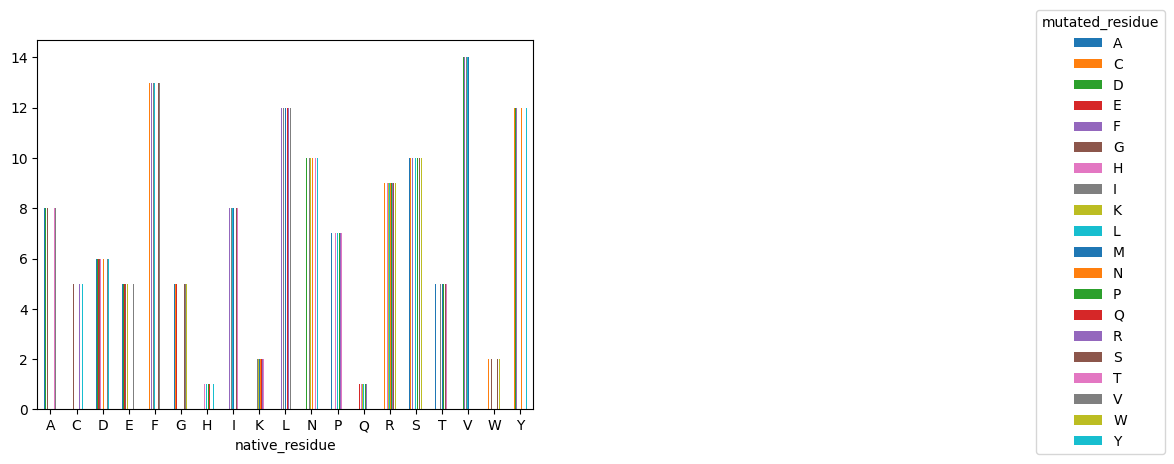

In [ ]:
crosstab_plot = crosstab.plot(kind='bar', rot=0)
crosstab_plot.legend(title='mutated_residue', bbox_to_anchor=(2, 1.1), loc='upper left')
plt.savefig("High resoltion 8.png",dpi=400)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Affinity         1180 non-null   float64
 1   dAffinity        1180 non-null   float64
 2   Stability        1180 non-null   float64
 3   dStability       1180 non-null   float64
 4   native_residue   1180 non-null   object 
 5   position         1180 non-null   int64  
 6   mutated_residue  1180 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 64.7+ KB


In [ ]:
data.describe()

,Affinity,dAffinity,Stability,dStability,position
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,-76.662923,-0.018581,-505.495453,1.165594,428.551695
std,2.385250,0.755222,155.032246,1.088873,60.069650
min,-88.093138,-6.609195,-1111.184654,-1.611617,332.000000
25%,-77.346596,-0.004321,-519.438045,0.354527,372.000000
50%,-77.223691,0.000000,-511.678405,0.977551,433.000000
75%,-74.275886,0.000362,-387.477624,1.728895,490.000000
max,-71.660856,5.729056,-372.063717,9.120628,526.000000


In [ ]:
data['native_residue'].value_counts()

L    132
V    126
R    126
F     91
S     90
Y     84
I     80
N     80
A     64
P     56
D     48
T     45
G     45
E     35
C     35
K     16
W     12
H      8
Q      7
Name: native_residue, dtype: int64

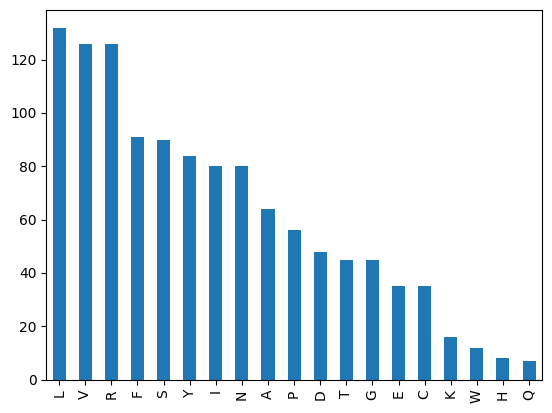

In [ ]:
data['native_residue'].value_counts().plot(kind='bar')
plt.savefig("High resoltion.png",dpi=400)

In [ ]:
data['mutated_residue'].value_counts()

S    106
L     77
F     74
I     73
V     71
D     61
A     60
T     59
H     58
R     57
Y     57
C     56
G     54
N     53
P     53
M     50
W     43
E     41
K     40
Q     37
Name: mutated_residue, dtype: int64

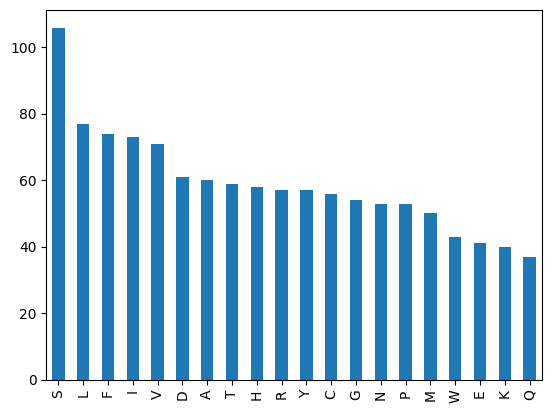

In [ ]:
data['mutated_residue'].value_counts().plot(kind='bar')
plt.savefig("High resoltion 2.png",dpi=400)

(array([  2.,   0.,  12.,  37.,  72.,  93., 467.,  39., 454.,   4.]),
 array([-88.09313762, -86.44990943, -84.80668125, -83.16345306,
        -81.52022488, -79.87699669, -78.2337685 , -76.59054032,
        -74.94731213, -73.30408395, -71.66085576]),
 <BarContainer object of 10 artists>)

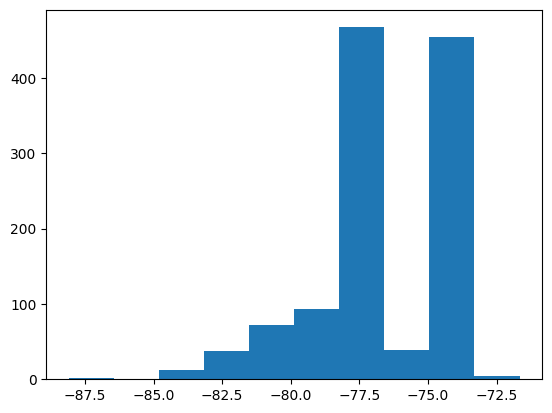

In [ ]:
plt.hist(data['Affinity'])

<ipython-input-20-49b80bb24e37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Affinity'])


<Axes: xlabel='Affinity', ylabel='Density'>

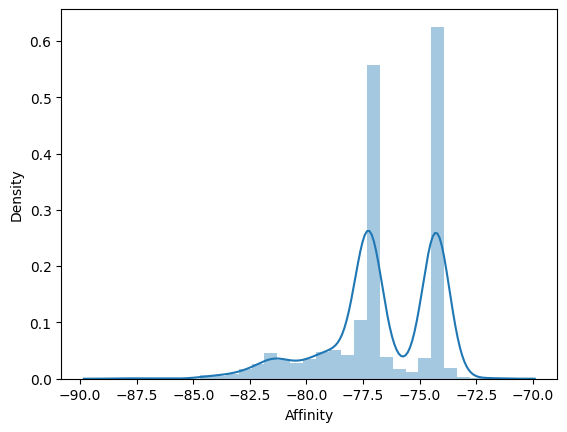

In [ ]:
sns.distplot(data['Affinity'])

<Axes: >

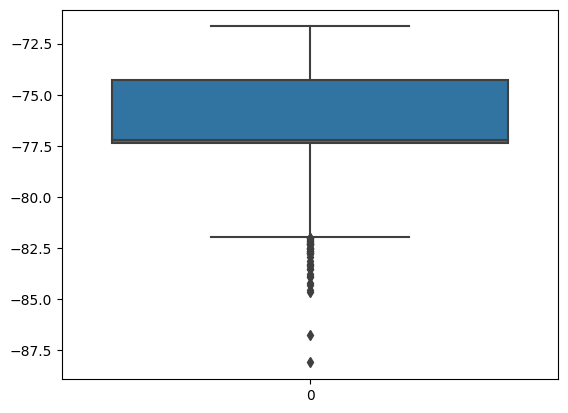

In [ ]:
sns.boxplot(data['Affinity'])

(array([   3.,    2.,    2.,   17.,   71., 1039.,   24.,   12.,    5.,
           5.]),
 array([-6.60919506, -5.37536992, -4.14154479, -2.90771965, -1.67389451,
        -0.44006938,  0.79375576,  2.0275809 ,  3.26140603,  4.49523117,
         5.7290563 ]),
 <BarContainer object of 10 artists>)

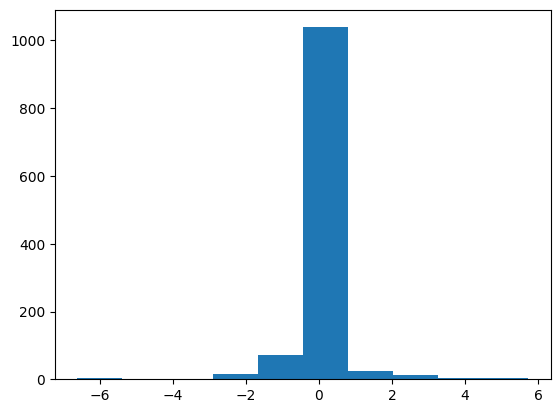

In [ ]:
plt.hist(data['dAffinity'])

<ipython-input-23-e4e1ad5da1fd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dAffinity'])


<Axes: xlabel='dAffinity', ylabel='Density'>

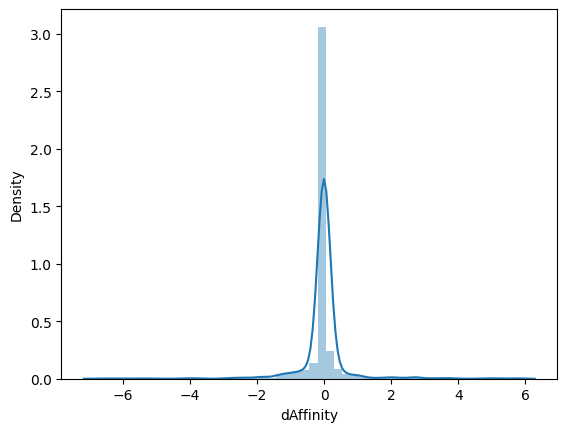

In [ ]:
sns.distplot(data['dAffinity'])

<Axes: >

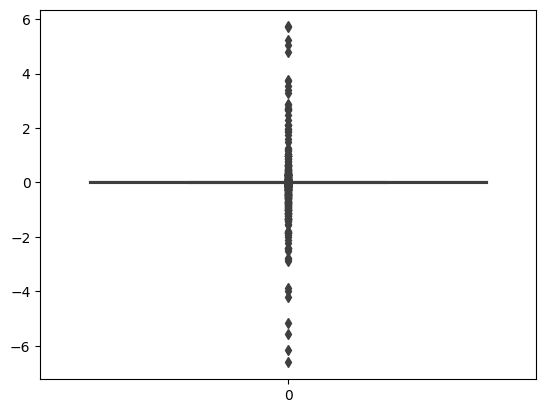

In [ ]:
sns.boxplot(data['dAffinity'])

(array([ 23.,  11.,   0.,  80.,   0.,   0.,   0., 170., 443., 453.]),
 array([-1111.184654  , -1037.27256035,  -963.3604667 ,  -889.44837305,
         -815.5362794 ,  -741.62418575,  -667.7120921 ,  -593.79999845,
         -519.8879048 ,  -445.97581115,  -372.0637175 ]),
 <BarContainer object of 10 artists>)

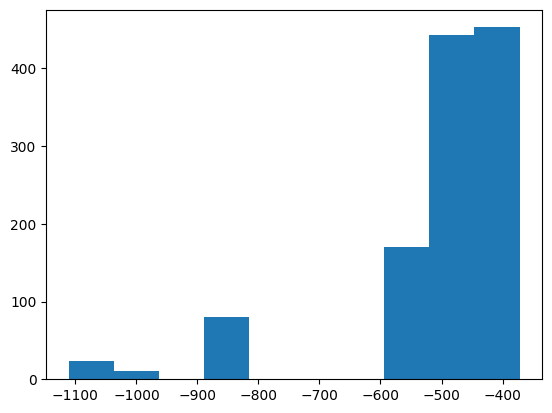

In [ ]:
plt.hist(data['Stability'])

<ipython-input-26-b20eb48c3906>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Stability'])


<Axes: xlabel='Stability', ylabel='Density'>

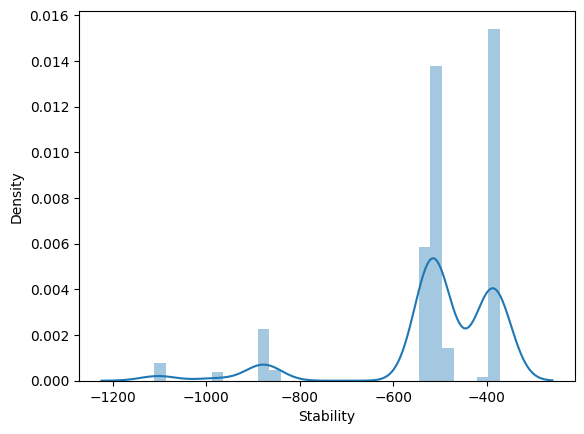

In [ ]:
sns.distplot(data['Stability'])

<Axes: >

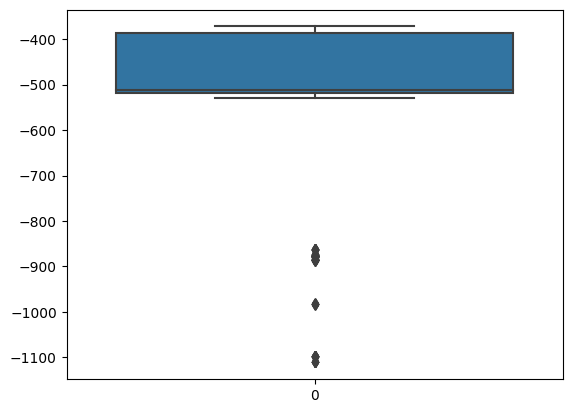

In [ ]:
sns.boxplot(data['Stability'])

(array([ 16., 346., 471., 243.,  70.,  27.,   6.,   0.,   0.,   1.]),
 array([-1.61161657, -0.5383921 ,  0.53483237,  1.60805685,  2.68128132,
         3.75450579,  4.82773026,  5.90095474,  6.97417921,  8.04740368,
         9.12062816]),
 <BarContainer object of 10 artists>)

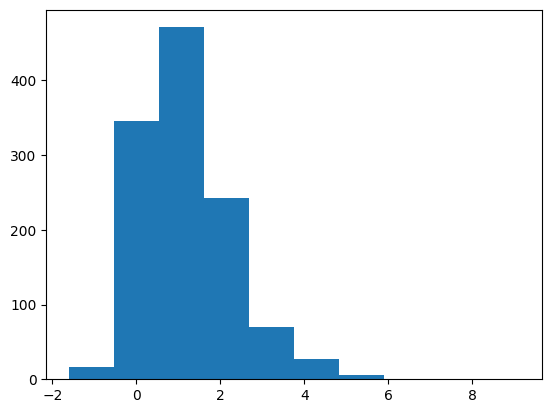

In [ ]:
plt.hist(data['dStability'])

<ipython-input-29-2bf35105a9c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dStability'])


<Axes: xlabel='dStability', ylabel='Density'>

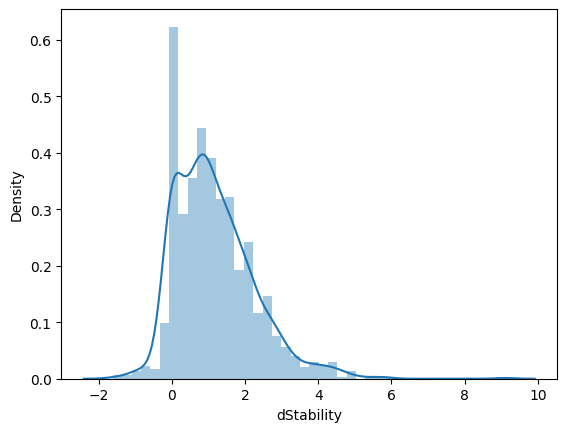

In [ ]:
sns.distplot(data['dStability'])

<Axes: >

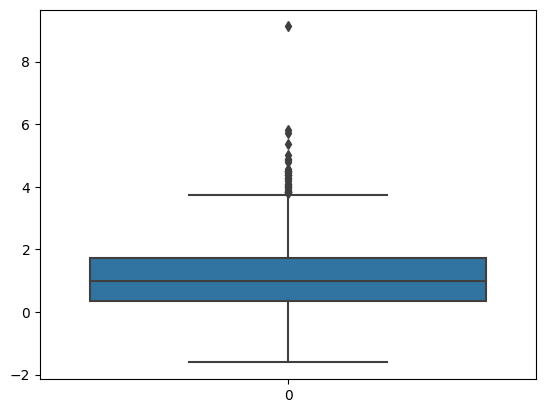

In [ ]:
sns.boxplot(data['dStability'])

(array([153., 142.,  69., 145.,  46., 161., 108.,  52., 134., 170.]),
 array([332. , 351.4, 370.8, 390.2, 409.6, 429. , 448.4, 467.8, 487.2,
        506.6, 526. ]),
 <BarContainer object of 10 artists>)

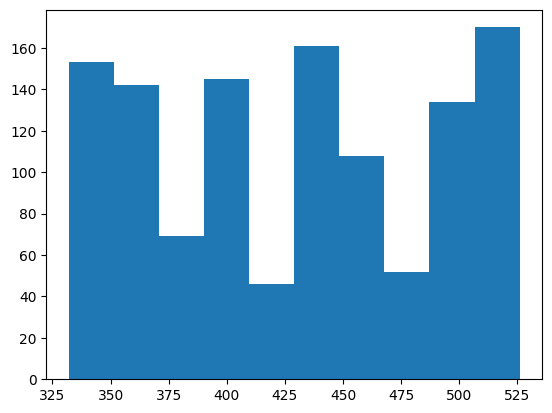

In [ ]:
plt.hist(data['position'])

<ipython-input-15-2ec30b8397ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['position'])


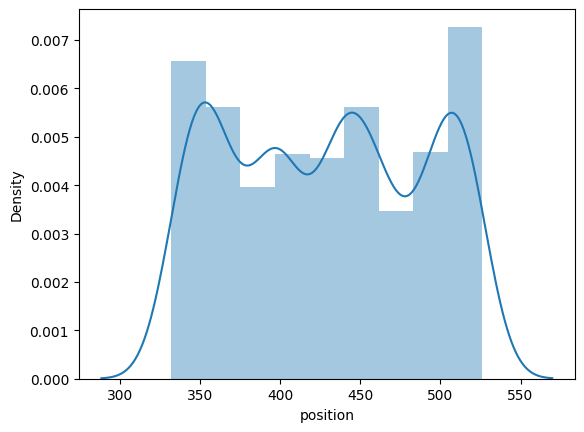

In [ ]:
sns.distplot(data['position'])
plt.savefig("High resoltion 2.png",dpi=400)

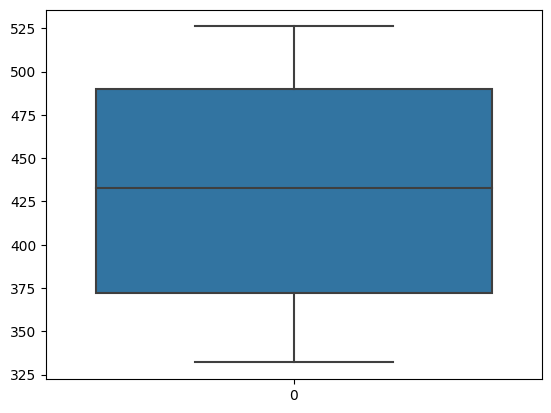

In [ ]:
sns.boxplot(data['position'])

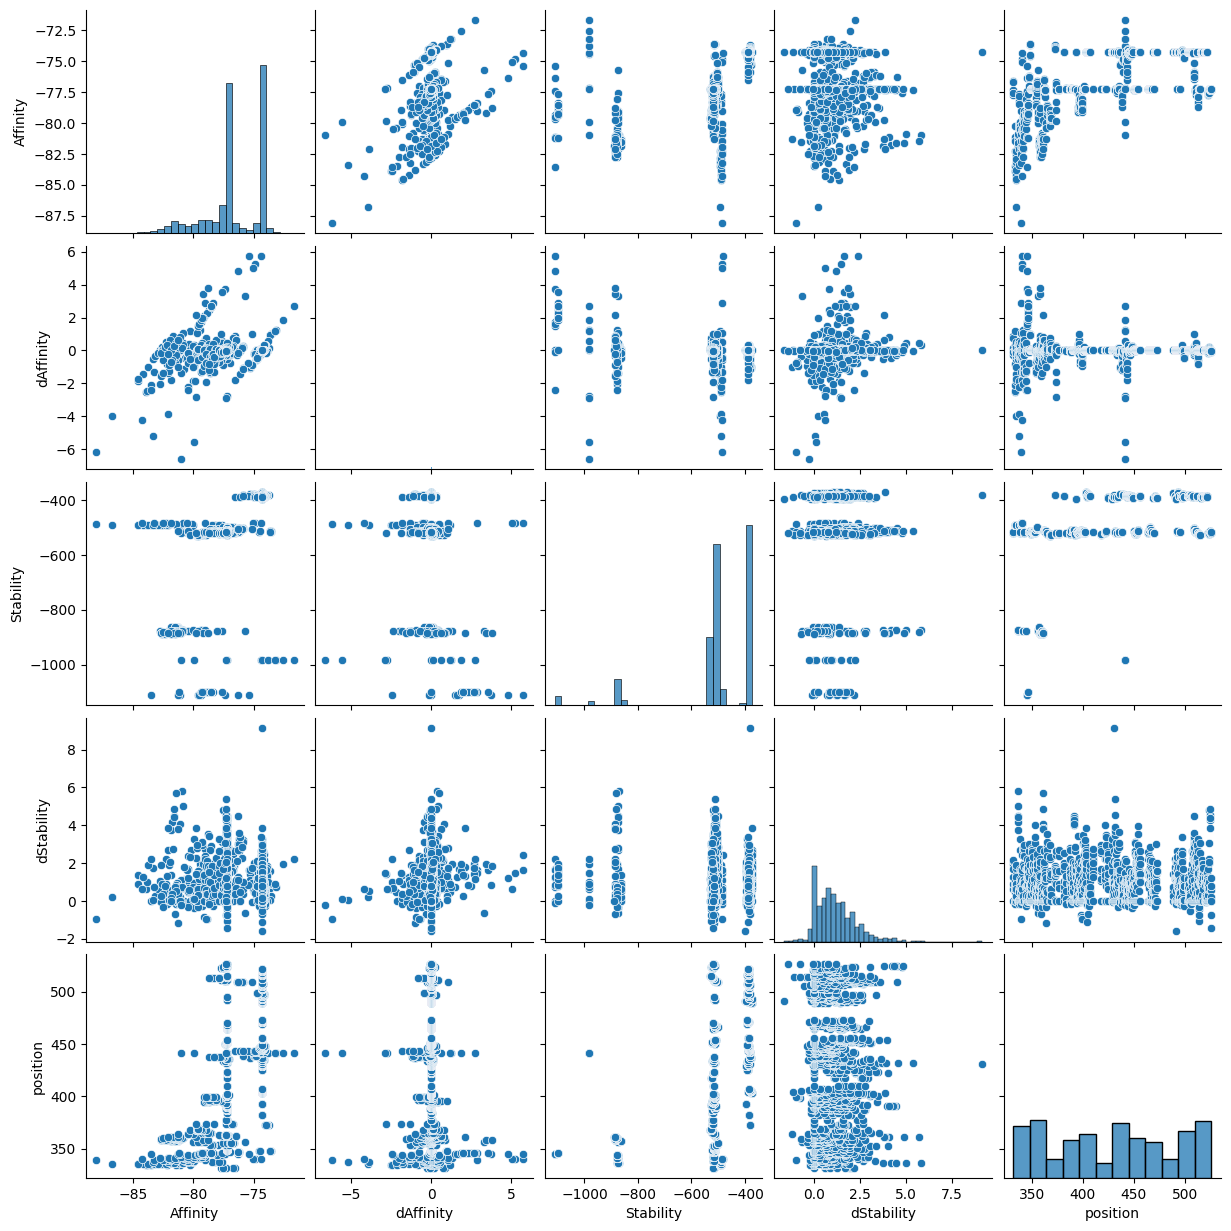

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr()

<ipython-input-80-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Affinity,dAffinity,Stability,dStability,Position
Affinity,1.000000,0.244196,0.649205,-0.060126,0.570230
dAffinity,0.244196,1.000000,-0.171955,0.124326,-0.015013
Stability,0.649205,-0.171955,1.000000,-0.073603,0.469953
dStability,-0.060126,0.124326,-0.073603,1.000000,-0.014828
Position,0.570230,-0.015013,0.469953,-0.014828,1.000000


In [ ]:
daata = data
daata['Position'] = daata['position']
daata = daata.drop('position', axis=1)

<ipython-input-21-d259b62e0483>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(daata.corr(), cmap='coolwarm')


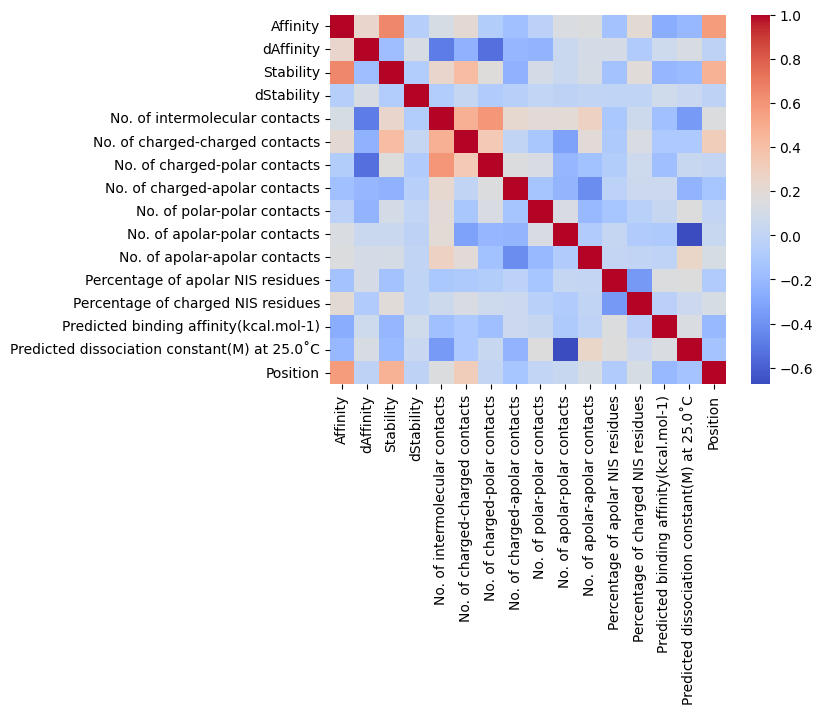

<Figure size 600x300 with 0 Axes>

In [ ]:
sns.heatmap(daata.corr(), cmap='coolwarm')
plt.savefig("Heatmap.png",dpi=400)

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data

,Affinity,dAffinity,Stability,dStability,No. of intermolecular contacts,No. of charged-charged contacts,No. of charged-polar contacts,No. of charged-apolar contacts,No. of polar-polar contacts,No. of apolar-polar contacts,No. of apolar-apolar contacts,Percentage of apolar NIS residues,Percentage of charged NIS residues,Predicted binding affinity(kcal.mol-1),Predicted dissociation constant(M) at 25.0˚C,native_residue,position,mutated_residue,Position
0,-77.450494,0.000000,-519.496314,0.000000,60,5,8,14,6,15,12,36.33,20.67,-10.4000,2.300000e-08,I,332,I,332
1,-76.571197,0.879297,-518.859181,0.637133,60,5,8,14,6,15,12,36.00,21.00,-10.5000,2.300000e-08,I,332,R,332
2,-77.456925,-0.006431,-517.547612,1.948702,60,5,8,14,6,15,12,36.00,20.67,-10.6000,2.100000e-08,I,332,N,332
3,-77.449147,0.001347,-518.885106,0.611208,60,5,8,14,6,15,12,36.33,20.67,-10.7000,2.300000e-08,I,332,L,332
4,-76.690015,0.760479,-517.399535,2.096779,60,5,8,14,6,15,12,36.00,21.00,-10.8000,2.300000e-08,I,332,K,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,-77.249480,-0.021597,-517.027832,0.786801,61,5,8,14,6,16,12,36.21,20.60,-10.1179,1.500000e-08,G,526,C,526
1176,-77.317239,-0.089356,-516.588186,1.226446,61,5,8,14,6,16,12,36.00,21.00,-10.1180,1.600000e-08,G,526,E,526
1177,-77.240715,-0.012832,-517.037783,0.776849,61,5,8,14,6,16,12,36.21,20.60,-10.1181,1.500000e-08,G,526,S,526
1178,-77.239905,-0.012022,-519.220894,-1.406261,61,5,8,14,6,16,12,36.09,20.53,-10.1182,1.400000e-08,G,526,W,526


In [ ]:
transformer = ColumnTransformer(transformers = [('tns', OneHotEncoder(sparse=False), ['native_residue', 'mutated_residue'])], remainder='passthrough')

**Taking all the features**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Affinity', axis=1), data['Affinity'], test_size=0.2)

In [ ]:
X_train

,dAffinity,Stability,dStability,No. of intermolecular contacts,No. of charged-charged contacts,No. of charged-polar contacts,No. of charged-apolar contacts,No. of polar-polar contacts,No. of apolar-polar contacts,No. of apolar-apolar contacts,Percentage of apolar NIS residues,Percentage of charged NIS residues,Predicted binding affinity(kcal.mol-1),Predicted dissociation constant(M) at 25.0˚C,native_residue,position,mutated_residue
883,0.000000e+00,-388.163606,0.000000,61,5,8,14,6,16,12,36.33,20.67,-10.8870,1.600000e-08,F,490,F
1148,-1.591177e-01,-521.358364,0.383433,61,5,8,15,6,15,12,36.33,21.00,-10.1152,2.100000e-08,T,523,R
920,-1.050000e-07,-372.457116,1.422410,61,5,8,14,6,16,12,36.33,20.33,-10.9240,1.500000e-08,R,493,S
745,2.858540e-04,-520.691965,2.350033,61,5,8,14,6,16,12,36.21,20.60,-10.7490,1.500000e-08,L,452,P
1065,-5.996783e-03,-386.366282,1.393100,61,5,8,14,6,16,12,36.33,20.67,-10.1069,1.600000e-08,V,512,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,6.392282e-01,-512.553293,0.701067,61,5,8,14,6,16,12,36.33,20.67,-10.2550,1.600000e-08,V,362,L
744,-5.057290e-04,-522.141518,0.900481,61,5,8,14,6,16,12,36.21,20.60,-10.7480,1.500000e-08,L,452,F
55,2.870028e+00,-484.328119,1.653282,59,5,8,11,6,16,13,36.54,20.60,-10.5900,2.800000e-08,D,339,G
98,1.593684e+00,-1109.817604,1.269371,58,4,7,14,6,16,11,36.45,20.74,-10.1020,2.000000e-08,T,345,S


In [ ]:
y_train.head(10)

883    -74.275886
1148   -77.717849
920    -74.275886
745    -77.228027
1065   -74.281519
816    -77.224906
1134   -74.275624
668    -74.929672
1041   -77.312161
385    -74.276154
Name: Affinity, dtype: float64

In [ ]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)
lr_all.score(X_test, y_test)

0.7265470081741716

In [ ]:
lr_all_ = LinearRegression()
np.mean(cross_val_score(lr_all_, X_train, y_train, scoring='r2', cv=10))

0.6540128807500525

In [ ]:
pred_lr_all = lr_all.predict(X_test)

The parameters of the line: [1.05272543 3.90469159]


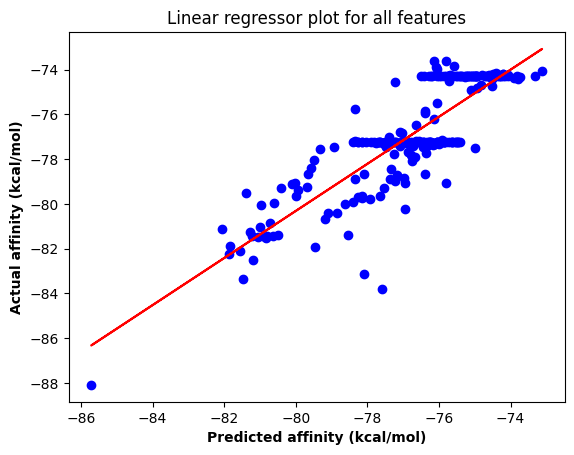

In [ ]:
theta = np.polyfit(pred_lr_all, y_test, 1)
print(f'The parameters of the line: {theta}')
y_line_lr_all = theta[1] + theta[0] * pred_lr_all
plt.scatter(pred_lr_all, y_test, color = 'blue')
plt.plot(pred_lr_all, y_line_lr_all, 'r')
plt.title('Linear regressor plot for all features')
plt.xlabel('Predicted affinity (kcal/mol)', fontweight='bold')
plt.ylabel('Actual affinity (kcal/mol)', fontweight='bold')
plt.savefig("Linear_Regressor_plot_for_all_features.png",dpi=400)

plt.show()

In [ ]:
dtr_all = DecisionTreeRegressor()
dtr_all.fit(X_train, y_train)
dtr_all.score(X_test, y_test)

0.9264553499284018

In [ ]:
dtr_all_ = DecisionTreeRegressor()
np.mean(cross_val_score(dtr_all_, X_train, y_train, scoring='r2', cv=10))

0.9130673488425204

In [ ]:
pred_dtr_all = dtr_all.predict(X_test)

The parameters of the line: [ 0.96402024 -2.73082992]


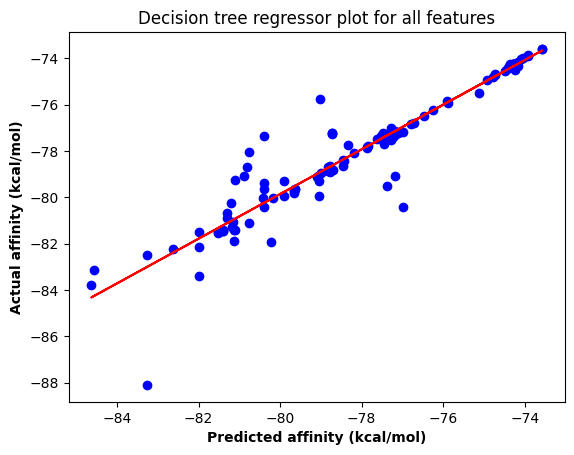

In [ ]:
theta = np.polyfit(pred_dtr_all, y_test, 1)
print(f'The parameters of the line: {theta}')
y_line_dtr_all = theta[1] + theta[0] * pred_dtr_all
plt.scatter(pred_dtr_all, y_test, color = 'blue')
plt.plot(pred_dtr_all, y_line_dtr_all, 'r')
plt.title('Decision tree regressor plot for all features')
plt.xlabel('Predicted affinity (kcal/mol)', fontweight='bold')
plt.ylabel('Actual affinity (kcal/mol)', fontweight='bold')
plt.savefig("Decision_Tree_Regressor_plot_for_all_features.png",dpi=400)

plt.show()

In [ ]:
n_estimators = [10, 50, 80, 100, 200]
max_depth = [1, 5, 10, 20, 30, None]
max_features = [0.25, 0.50, 0.75, 1]
max_samples = [0.25, 0.50, 0.75, 1]

param_grid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth' : max_depth, 'max_samples' : max_samples}

In [ ]:
rf_all = RandomForestRegressor()
rf_grid_all = GridSearchCV(estimator = rf_all, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = -1)
rf_grid_all.fit(X_train, y_train)

NameError: ignored

In [ ]:
print("Best Score: ", rf_grid_all.best_score_)
print("Best Params: ", rf_grid_all.best_params_)

Best Score:  0.9514160865035037
Best Params:  {'max_depth': None, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 80}


In [ ]:
rfr_all = RandomForestRegressor(n_estimators=80, max_samples=0.75, max_features=0.75)
rfr_all.fit(X_train, y_train)
rfr_all.score(X_test, y_test)

0.9676092786837872

In [ ]:
rfr_all_ = RandomForestRegressor(n_estimators=80, max_samples=0.75, max_features=0.75)
np.mean(cross_val_score(rfr_all_, X_train, y_train, scoring='r2', cv=10))

0.950537078830331

In [ ]:
pred_rfr_all = rfr_all.predict(X_test)

The parameters of the line: [1.0252385  1.92265411]


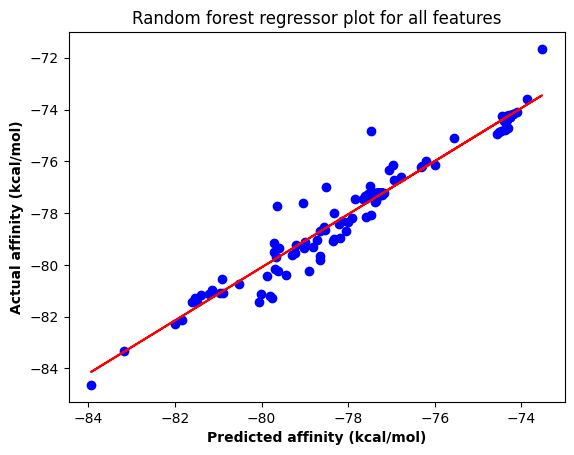

In [ ]:
theta = np.polyfit(pred_rfr_all, y_test, 1)
print(f'The parameters of the line: {theta}')
y_line_rfr_all = theta[1] + theta[0] * pred_rfr_all
plt.scatter(pred_rfr_all, y_test, color = 'blue')
plt.plot(pred_rfr_all, y_line_rfr_all, 'r')
plt.title('Random forest regressor plot for all features')
plt.xlabel('Predicted affinity (kcal/mol)', fontweight='bold')
plt.ylabel('Actual affinity (kcal/mol)', fontweight='bold')
plt.savefig("Random_Forest_Plot_for_all_features.png",dpi=400)

plt.show()

In [ ]:
X_train[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.85000000e-08,
       -3.87346783e+02,  3.92903340e-02,  8.54000000e+02,  6.10000000e+01,
        5.00000000e+00,  8.00000000e+00,  1.40000000e+01,  6.00000000e+00,
        1.60000000e+01,  1.20000000e+01,  3.63300000e+01,  2.06700000e+01,
       -1.08580000e+01,  

In [ ]:
xgb_all = xg.XGBRegressor(n_estimators= 50, learning_rate= 0.6, max_depth= 10, alpha= 0.08)
xgb_all.fit(X_train, y_train)
xgb_all.score(X_test, y_test)

0.9708302526783927

In [ ]:
xgb_all_ = xg.XGBRegressor(n_estimators= 50, learning_rate= 0.6, max_depth= 10, alpha= 0.08)
np.mean(cross_val_score(xgb_all_, X_train, y_train, scoring='r2', cv=10))

0.9568875891760383

In [ ]:
pred_xgb_all = xgb_all.predict(X_test)

The parameters of the line: [ 0.97122782 -2.1729279 ]


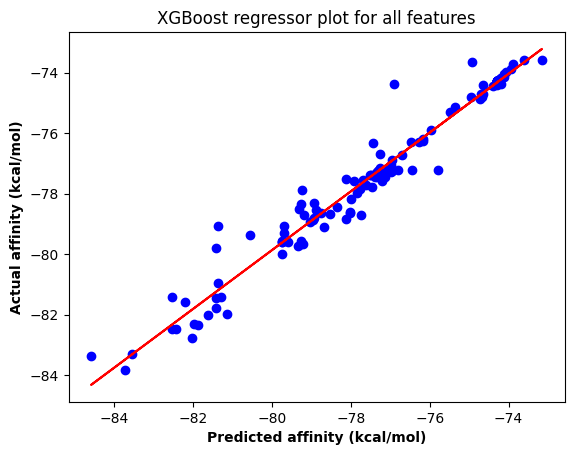

In [ ]:
theta = np.polyfit(pred_xgb_all, y_test, 1)
print(f'The parameters of the line: {theta}')
y_line_xgb_all = theta[1] + theta[0] * pred_xgb_all
plt.scatter(pred_xgb_all, y_test, color = 'blue')
plt.plot(pred_xgb_all, y_line_xgb_all, 'r')
plt.title('XGBoost regressor plot for all features')
plt.xlabel('Predicted affinity (kcal/mol)', fontweight='bold')
plt.ylabel('Actual affinity (kcal/mol)', fontweight='bold')
plt.savefig("XGBoost_Plot_for_all_features.png",dpi=400)

plt.show()

**Position**

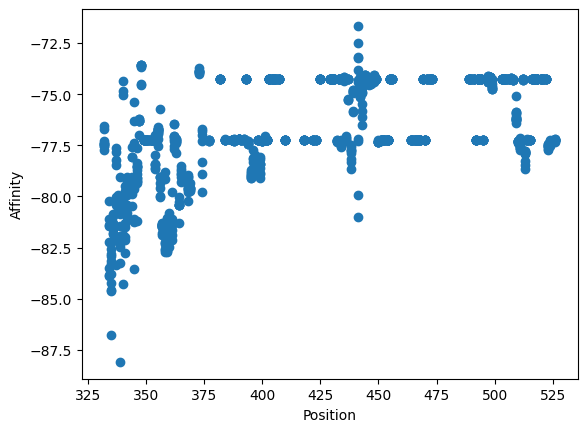

In [ ]:
plt.scatter(data['position'], data['Affinity'])
plt.xlabel("Position")
plt.ylabel("Affinity")
plt.savefig("High resoltion 6.png",dpi=400)

In [ ]:
data

,Affinity,dAffinity,Stability,dStability,No. of intermolecular contacts,No. of charged-charged contacts,No. of charged-polar contacts,No. of charged-apolar contacts,No. of polar-polar contacts,No. of apolar-polar contacts,No. of apolar-apolar contacts,Percentage of apolar NIS residues,Percentage of charged NIS residues,Predicted binding affinity(kcal.mol-1),Predicted dissociation constant (M) at 25.0˚C,native_residue,position,mutated_residue
0,-84.044703,0.000000,-1513.542445,0.000000,77,3,12,13,9,28,12,35.96,20.00,-12.6,5.400000e-10,T,345,T
1,-83.156100,0.888604,-1512.728823,0.813622,77,3,12,13,8,28,13,36.17,20.00,-12.8,4.200000e-10,T,345,A
2,-87.734406,-3.689703,-1512.529630,1.012815,79,3,14,15,8,27,12,35.90,20.30,-12.8,4.300000e-10,T,345,R
3,-87.738216,-3.693513,-1512.655783,0.886662,82,3,14,14,10,29,12,35.96,20.00,-12.8,4.300000e-10,T,345,N
4,-85.483365,-1.438662,-1513.510484,0.031961,78,3,12,13,8,29,13,36.03,20.04,-13.0,2.700000e-10,T,345,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,-87.017756,-1.255056,-1505.821797,2.235996,78,3,12,14,9,28,12,35.96,20.00,-12.7,4.600000e-10,R,509,M
172,-84.344759,1.417940,-1505.459828,2.597965,78,3,12,14,9,28,12,35.88,20.17,-12.7,4.600000e-10,R,509,P
173,-85.591098,0.171601,-1504.358315,3.699478,79,3,12,14,9,29,12,35.82,20.04,-13.0,3.000000e-10,R,509,S
174,-84.288628,1.474072,-1505.705244,2.352549,78,3,12,14,9,28,12,35.88,20.17,-12.7,4.600000e-10,R,509,T


In [ ]:
df = data[['mutated_residue', 'position', 'native_residue', 'Affinity']]

In [ ]:
df

,mutated_residue,position,native_residue,Affinity
0,I,332,I,-77.450494
1,R,332,I,-76.571197
2,N,332,I,-77.456925
3,L,332,I,-77.449147
4,K,332,I,-76.690015
...,...,...,...,...
1175,C,526,G,-77.249480
1176,E,526,G,-77.317239
1177,S,526,G,-77.240715
1178,W,526,G,-77.239905


In [ ]:
X_train_position, X_test_position, y_train_position, y_test_position = train_test_split(df.drop('Affinity', axis=1), df['Affinity'], test_size=0.2)

In [ ]:
print(X_train_position.shape)
print(X_test_position.shape)
print(y_train_position.shape)
print(y_test_position.shape)

(944, 3)
(236, 3)
(944,)
(236,)


In [ ]:
X_train_position = transformer.fit_transform(X_train_position)
X_test_position = transformer.transform(X_test_position)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(X_train_position.shape)
print(X_test_position.shape)

(944, 40)
(236, 40)


In [ ]:
xgb_position = xg.XGBRegressor(n_estimators= 50, learning_rate= 0.6, max_depth= 10, alpha= 0.08)
xgb_position.fit(X_train_position, y_train_position)

XGBRegressor(alpha=0.08, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [ ]:
xgb_position.score(X_test_position, y_test_position)

0.8864087222414216

In [ ]:
xgb_position_ = xg.XGBRegressor(n_estimators= 50, learning_rate= 0.6, max_depth= 10, alpha= 0.08)
np.mean(cross_val_score(xgb_position_, X_train_position, y_train_position, scoring='r2', cv=10))

0.887965033648004

In [ ]:
pred_xgb_position = xgb_position.predict(X_test_position)

The parameters of the line: [ 0.98830576 -0.89839696]


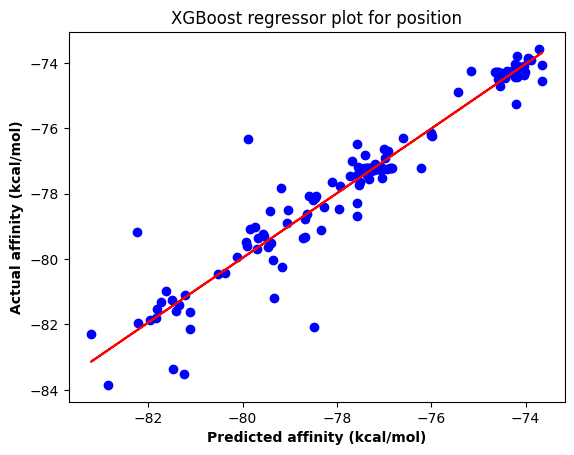

In [ ]:
theta = np.polyfit(pred_xgb_position, y_test_position, 1)
print(f'The parameters of the line: {theta}')
y_line_xgb_position = theta[1] + theta[0] * pred_xgb_position
plt.scatter(pred_xgb_position, y_test_position, color = 'blue')
plt.plot(pred_xgb_position, y_line_xgb_position, 'r')
plt.title('XGBoost regressor plot for position')
plt.xlabel('Predicted affinity (kcal/mol)', fontweight='bold')
plt.ylabel('Actual affinity (kcal/mol)', fontweight='bold')
plt.savefig("XGBoost_Plot_for_position.png",dpi=400)

plt.show()

In [ ]:
df

,mutated_residue,position,native_residue,Affinity
0,I,332,I,-77.450494
1,R,332,I,-76.571197
2,N,332,I,-77.456925
3,L,332,I,-77.449147
4,K,332,I,-76.690015
...,...,...,...,...
1175,C,526,G,-77.249480
1176,E,526,G,-77.317239
1177,S,526,G,-77.240715
1178,W,526,G,-77.239905


In [ ]:
X_train_position['native_residue'] = X_train_position['native_residue'].replace(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
X_train_position['mutated_residue'] = X_train_position['mutated_residue'].replace(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
X_train_position

,Affinity,native_residue,position,mutated_residue
0,-77.450494,8,332,8
1,-76.571197,8,332,15
2,-77.456925,8,332,12
3,-77.449147,8,332,10
4,-76.690015,8,332,9
...,...,...,...,...
1175,-77.249480,6,526,2
1176,-77.317239,6,526,4
1177,-77.240715,6,526,16
1178,-77.239905,6,526,19


In [ ]:
import plotly.express as px

fig = px.scatter_3d(data, x=data['native_residue'], y=data['position'], z=data['mutated_residue'], color=data['Affinity'])
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_train_position, x=X_train_position['native_residue'], y=X_train_position['position'], z=X_train_position['mutated_residue'], color=X_train_position['Affinity'])
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()

In [ ]:
X_train_position = df.drop('Affinity', axis=1)
y_train_position = df['Affinity']

In [ ]:
X_train_position

,mutated_residue,position,native_residue
0,I,332,I
1,R,332,I
2,N,332,I
3,L,332,I
4,K,332,I
...,...,...,...
1175,C,526,G
1176,E,526,G
1177,S,526,G
1178,W,526,G


In [ ]:
y_train_position

0      -77.450494
1      -76.571197
2      -77.456925
3      -77.449147
4      -76.690015
          ...    
1175   -77.249480
1176   -77.317239
1177   -77.240715
1178   -77.239905
1179   -77.250891
Name: Affinity, Length: 1180, dtype: float64

In [ ]:
count = 0
for i in range(1179):
  if df.iloc[i]['position'] == 508:
    count += 1
    print(i, df.iloc[i]['native_residue'], df.iloc[i]['position'], df.iloc[i]['mutated_residue'])

print(count)

1018 Y 508 Y
1019 Y 508 N
1020 Y 508 D
1021 Y 508 C
1022 Y 508 H
1023 Y 508 F
1024 Y 508 S
7


In [ ]:
X_train_position_340 = X_train_position.drop([61, 62, 64, 37, 38, 39, 40, 42, 43, 1024])
y_train_position_340 = y_train_position.drop([61, 62, 64, 37, 38, 39, 40, 42, 43, 1024])
X_train_position_508 = X_train_position.drop([1022])
y_train_position_508 = y_train_position.drop([1022])
X_train_position_337 = X_train_position.drop([37, 38, 39, 40, 42, 43])
y_train_position_337 = y_train_position.drop([37, 38, 39, 40, 42, 43])

In [ ]:
X_train_position_340 = transformer.fit_transform(X_train_position_340)
X_train_position_508 = transformer.fit_transform(X_train_position_508)
X_train_position_337 = transformer.fit_transform(X_train_position_337)
print(X_train_position_340.shape)
# X_test_position = transformer.transform(X_test_position)

(1170, 40)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_position_340

array([[  0.,   0.,   0., ...,   0.,   0., 332.],
       [  0.,   0.,   0., ...,   0.,   0., 332.],
       [  0.,   0.,   0., ...,   0.,   0., 332.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 526.],
       [  0.,   0.,   0., ...,   1.,   0., 526.],
       [  0.,   0.,   0., ...,   0.,   0., 526.]])

In [ ]:
y_train_position_340

0      -77.450494
1      -76.571197
2      -77.456925
3      -77.449147
4      -76.690015
          ...    
1175   -77.249480
1176   -77.317239
1177   -77.240715
1178   -77.239905
1179   -77.250891
Name: Affinity, Length: 1171, dtype: float64

In [ ]:
xgb_position_1 = xg.XGBRegressor(n_estimators= 50, learning_rate= 0.6, max_depth= 10, alpha= 0.08)
xgb_position_1.fit(X_train_position_340, y_train_position_340)

XGBRegressor(alpha=0.08, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [ ]:
data_check_340 = [[340, 'E', 'A'], [340, 'E', 'C'], [340, 'E', 'D'], [340, 'E', 'E'], [340, 'E', 'F'], [340, 'E', 'G'], [340, 'E', 'H'], [340, 'E', 'I'], [340, 'E', 'K'], [340, 'E', 'L'], [340, 'E', 'M'], [340, 'E', 'N'], [340, 'E', 'P'], [340, 'E', 'Q'], [340, 'E', 'R'], [340, 'E', 'S'], [340, 'E', 'T'], [340, 'E', 'V'], [340, 'E', 'W'], [340, 'E', 'Y']]
df = pd.DataFrame(data_check_340, columns=['position', 'native_residue', 'mutated_residue'])
data_check_340_encoded = transformer.transform(df)
check_340 = data_check_340_encoded[0]

In [ ]:
check_340

array([  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 340.])

In [ ]:
pred_340 = xgb_position_1.predict(data_check_340_encoded)
pred_340

array([-74.82453 , -76.28068 , -76.10541 , -80.00981 , -76.42862 ,
       -74.35987 , -76.5968  , -76.360916, -77.71003 , -76.210236,
       -76.555   , -76.58946 , -76.64991 , -76.54954 , -76.95846 ,
       -75.92345 , -76.46837 , -75.106094, -76.602036, -76.92521 ],
      dtype=float32)

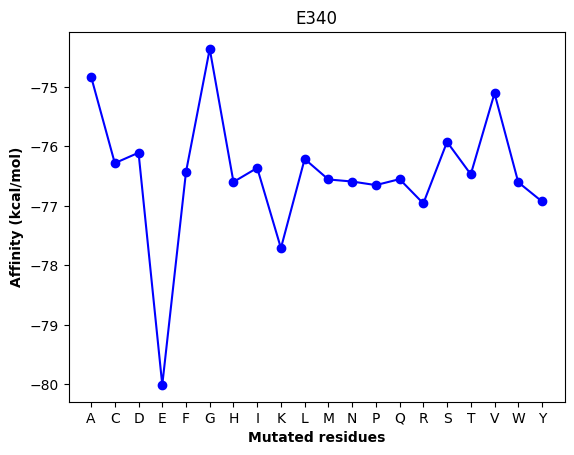

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("E340")
plt.plot(X_label, pred_340, color='blue', marker='o')
plt.savefig("E340_xg-boost_2.png", dpi=400)

plt.show()

In [ ]:
data_check_508 = [[508, 'Y', 'A'], [508, 'Y', 'C'], [508, 'Y', 'D'], [508, 'Y', 'E'], [508, 'Y', 'F'], [508, 'Y', 'G'], [508, 'Y', 'H'], [508, 'Y', 'I'], [508, 'Y', 'K'], [508, 'Y', 'L'], [508, 'Y', 'M'], [508, 'Y', 'N'], [508, 'Y', 'P'], [508, 'Y', 'Q'], [508, 'Y', 'R'], [508, 'Y', 'S'], [508, 'Y', 'T'], [508, 'Y', 'V'], [508, 'Y', 'W'], [508, 'Y', 'Y']]
df = pd.DataFrame(data_check_508, columns=['position', 'native_residue', 'mutated_residue'])
data_check_508_encoded = transformer.transform(df)
check_508 = data_check_508_encoded[0]

In [ ]:
check_508

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 508.])

In [ ]:
pred_508 = xgb_position_1.predict(data_check_508_encoded)
pred_508

array([-74.28205 , -74.28671 , -74.270256, -74.275246, -74.318695,
       -74.30702 , -74.26897 , -74.22655 , -74.14271 , -74.394264,
       -74.29034 , -74.298775, -74.28042 , -74.32045 , -74.33254 ,
       -74.30279 , -74.25932 , -74.28049 , -74.45252 , -74.32509 ],
      dtype=float32)

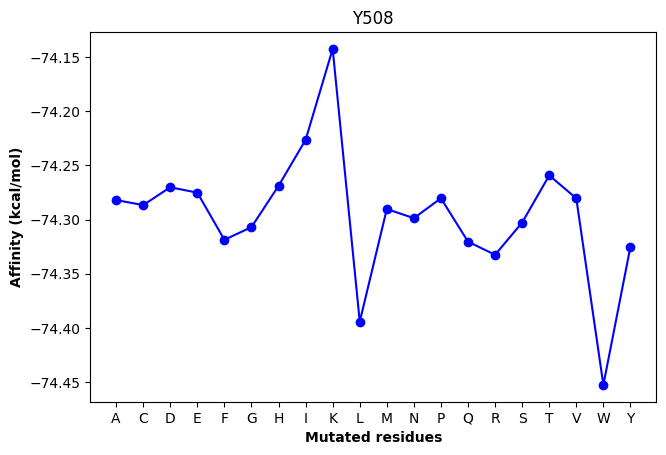

In [ ]:
plt.figure(figsize=(7.3,4.8))
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("Y508")
plt.plot(X_label, pred_508, color='blue', marker='o')
plt.savefig("Y508_xg-boost.png", dpi=400)

plt.show()

In [ ]:
data_check_337 = [[337, 'P', 'A'], [337, 'P', 'C'], [337, 'P', 'D'], [337, 'P', 'E'], [337, 'P', 'F'], [337, 'P', 'G'], [337, 'P', 'H'], [337, 'P', 'I'], [337, 'P', 'K'], [337, 'P', 'L'], [337, 'P', 'M'], [337, 'P', 'N'], [337, 'P', 'P'], [337, 'P', 'Q'], [337, 'P', 'R'], [337, 'P', 'S'], [337, 'P', 'T'], [337, 'P', 'V'], [337, 'P', 'W'], [337, 'P', 'Y']]
df = pd.DataFrame(data_check_337, columns=['position', 'native_residue', 'mutated_residue'])
data_check_337_encoded = transformer.transform(df)
check_337 = data_check_337_encoded[0]

In [ ]:
pred_337 = xgb_position_1.predict(data_check_337_encoded)
pred_337

array([-76.8928  , -77.87986 , -77.14084 , -79.07931 , -77.91868 ,
       -77.05601 , -78.44897 , -78.11316 , -78.94707 , -77.83574 ,
       -78.17537 , -78.25321 , -78.19436 , -78.28147 , -78.44525 ,
       -77.48576 , -78.12749 , -78.02246 , -78.37747 , -78.499435],
      dtype=float32)

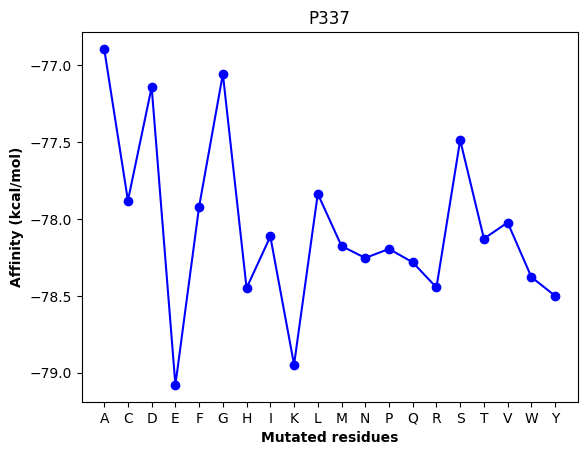

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("P337")
plt.plot(X_label, pred_337, color='blue', marker='o')
plt.savefig('P337_xg-boost_3.png', dpi=400)

plt.show()

In [ ]:
lr_position = LinearRegression()
lr_position.fit(X_train_position, y_train_position)
lr_position.score(X_test_position, y_test_position)

0.36968966420856764

In [ ]:
lr_position_ = LinearRegression()
np.mean(cross_val_score(lr_position_, X_train_position, y_train_position, scoring='r2', cv=10))

0.32280099996345035

In [ ]:
pred_lr_position = lr_position.predict(X_test_position)

The parameters of the line: [1.07704123 5.96687684]


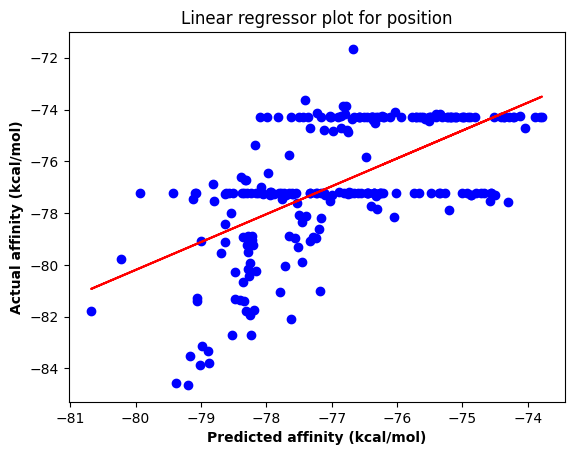

In [ ]:
theta = np.polyfit(pred_lr_position, y_test_position, 1)
print(f'The parameters of the line: {theta}')
y_line_lr_position = theta[1] + theta[0] * pred_lr_position
plt.scatter(pred_lr_position, y_test_position, color = 'blue')
plt.plot(pred_lr_position, y_line_lr_position, 'r')
plt.title('Linear regressor plot for position')
plt.xlabel('Predicted affinity (kcal/mol)', fontweight='bold')
plt.ylabel('Actual affinity (kcal/mol)', fontweight='bold')
plt.savefig("Linear_Regressor_plot_for_position.png",dpi=400)

plt.show()

In [ ]:
svr_position = SVR(kernel = "rbf")
svr_position.fit(X_train_position, y_train_position)
svr_position.score(X_test_position, y_test_position)

0.3376496080619331

In [ ]:
dtr_position = DecisionTreeRegressor()
dtr_position.fit(X_train_position, y_train_position)
dtr_position.score(X_test_position, y_test_position)

0.8615798689565659

In [ ]:
dtr_position_ = DecisionTreeRegressor()
np.mean(cross_val_score(dtr_position_, X_train_position, y_train_position, scoring='r2', cv=10))

0.8614935975348906

In [ ]:
pred_dtr_position = dtr_position.predict(X_test_position)

The parameters of the line: [ 0.96905733 -2.37838344]


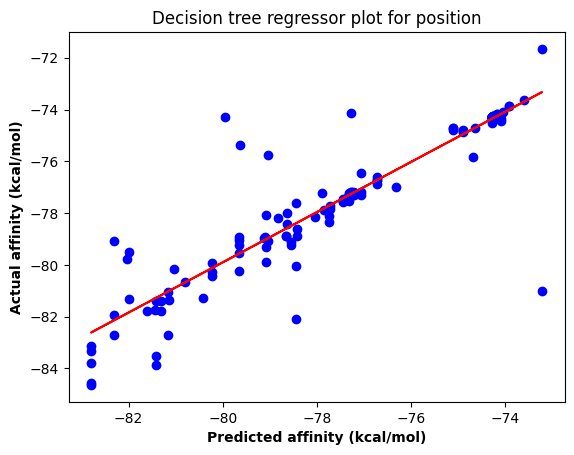

In [ ]:
theta = np.polyfit(pred_dtr_position, y_test_position, 1)
print(f'The parameters of the line: {theta}')
y_line_dtr_position = theta[1] + theta[0] * pred_dtr_position
plt.scatter(pred_dtr_position, y_test_position, color = 'blue')
plt.plot(pred_dtr_position, y_line_dtr_position, 'r')
plt.title('Decision tree regressor plot for position')
plt.xlabel('Predicted affinity (kcal/mol)', fontweight='bold')
plt.ylabel('Actual affinity (kcal/mol)', fontweight='bold')
plt.savefig("Decision_Tree_Regressor_plot_for_position.png",dpi=400)

plt.show()

In [ ]:
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = -1)
rf_grid.fit(X_train_position, y_train_position)

NameError: ignored

In [ ]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

In [ ]:
rfr_position = RandomForestRegressor(n_estimators=100, max_samples=0.75, max_features=0.75)
rfr_position.fit(X_train_position, y_train_position)
rfr_position.score(X_test_position, y_test_position)

0.9313298077064063

In [ ]:
rfr_position_ = RandomForestRegressor(n_estimators=100, max_samples=0.75, max_features=0.75)
np.mean(cross_val_score(rfr_position_, X_train_position, y_train_position, scoring='r2', cv=10))

0.897788963708682

In [ ]:
pred_rfr_position = rfr_position.predict(X_test_position)

The parameters of the line: [1.00732759 0.62833709]


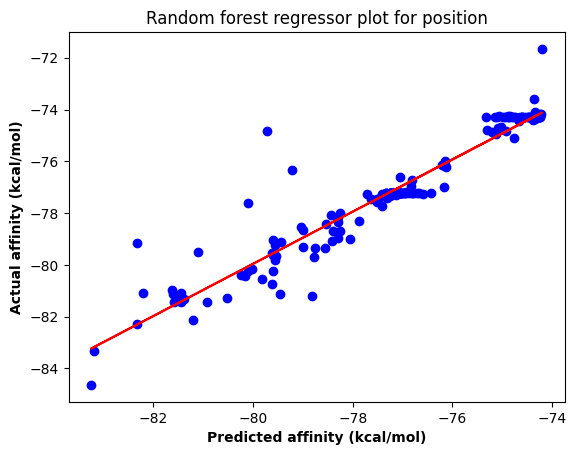

In [ ]:
theta_1 = np.polyfit(pred_rfr_position, y_test_position, 1)
print(f'The parameters of the line: {theta_1}')
y_line_rfr_position = theta_1[1] + theta_1[0] * pred_rfr_position
plt.scatter(pred_rfr_position, y_test_position, color = 'blue')
plt.plot(pred_rfr_position, y_line_rfr_position, 'r')
plt.title('Random forest regressor plot for position')
plt.xlabel('Predicted affinity (kcal/mol)', fontweight='bold')
plt.ylabel('Actual affinity (kcal/mol)', fontweight='bold')
plt.savefig("Random_Forest_Plot_for_position.png",dpi=400)

plt.show()

In [ ]:
data_check_337 = [[337, 'P', 'A'], [337, 'P', 'C'], [337, 'P', 'D'], [337, 'P', 'E'], [337, 'P', 'F'], [337, 'P', 'G'], [337, 'P', 'H'], [337, 'P', 'I'], [337, 'P', 'K'], [337, 'P', 'L'], [337, 'P', 'M'], [337, 'P', 'N'], [337, 'P', 'P'], [337, 'P', 'Q'], [337, 'P', 'R'], [337, 'P', 'S'], [337, 'P', 'T'], [337, 'P', 'V'], [337, 'P', 'W'], [337, 'P', 'Y']]
df = pd.DataFrame(data_check_337, columns=['position', 'native_residue', 'mutated_residue'])
data_check_337_encoded = transformer.transform(df)
check_337 = data_check_337_encoded[0]
data_check_337_encoded

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 337.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 337.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 337.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,  

In [ ]:
pred_337 = rfr_position.predict(data_check_337_encoded)
pred_337

array([-80.27887208, -80.31987991, -80.39785814, -80.41672527,
       -80.27852839, -79.35397525, -80.00355389, -80.46306514,
       -80.92957218, -79.00785672, -80.42358888, -80.59468192,
       -79.37728115, -82.63467709, -80.46810461, -80.91824312,
       -80.47070306, -79.60258234, -80.39913012, -81.51712685])

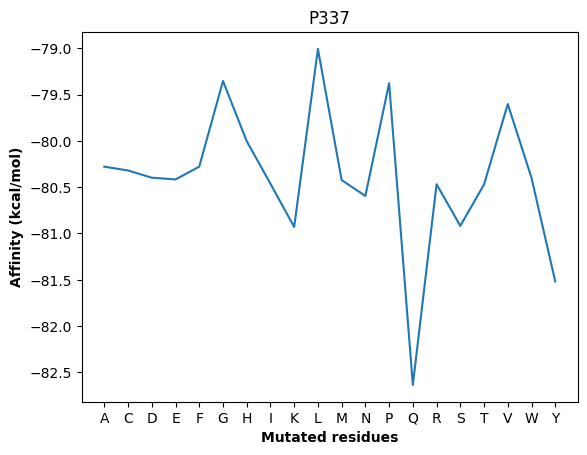

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("P337")
plt.plot(X_label, pred_337)
plt.savefig("P337.png",dpi=400)
plt.show()

In [ ]:
data_check_346 = [[346, 'R', 'A'], [346, 'R', 'C'], [346, 'R', 'D'], [346, 'R', 'E'], [346, 'R', 'F'], [346, 'R', 'G'], [346, 'R', 'H'], [346, 'R', 'I'], [346, 'R', 'K'], [346, 'R', 'L'], [346, 'R', 'M'], [346, 'R', 'N'], [346, 'R', 'P'], [346, 'R', 'Q'], [346, 'R', 'R'], [346, 'R', 'S'], [346, 'R', 'T'], [346, 'R', 'V'], [346, 'R', 'W'], [346, 'R', 'Y']]
df = pd.DataFrame(data_check_346, columns=['position', 'native_residue', 'mutated_residue'])
data_check_346_encoded = transformer.transform(df)
check_346 = data_check_346_encoded[0]

In [ ]:
pred_346 = rfr_position.predict(data_check_346_encoded)
pred_346

array([-78.52893967, -78.69761283, -78.69889097, -78.93503659,
       -78.69889097, -78.26407767, -78.65523337, -79.09553635,
       -79.22609146, -78.89416519, -78.43721027, -78.89533251,
       -77.82578758, -78.89202376, -78.74708259, -78.5953857 ,
       -78.99403713, -78.49237534, -78.95201726, -78.69889097])

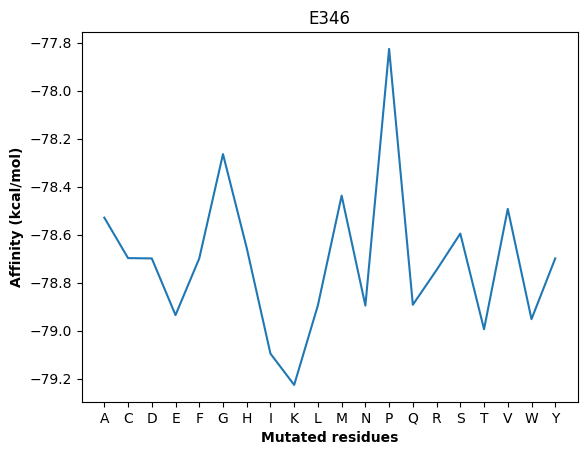

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("E346")
plt.plot(X_label, pred_346)
plt.savefig("E346.png",dpi=400)
plt.show()

In [ ]:
data_check_356 = [[356, 'K', 'A'], [356, 'K', 'C'], [356, 'K', 'D'], [356, 'K', 'E'], [356, 'K', 'F'], [356, 'K', 'G'], [356, 'K', 'H'], [356, 'K', 'I'], [356, 'K', 'K'], [356, 'K', 'L'], [356, 'K', 'M'], [356, 'K', 'N'], [356, 'K', 'P'], [356, 'K', 'Q'], [356, 'K', 'R'], [356, 'K', 'S'], [356, 'K', 'T'], [356, 'K', 'V'], [356, 'K', 'W'], [356, 'K', 'Y']]
df = pd.DataFrame(data_check_356, columns=['position', 'native_residue', 'mutated_residue'])
data_check_356_encoded = transformer.transform(df)
check_356 = data_check_356_encoded[0]

In [ ]:
pred_356 = rfr_position.predict(data_check_356_encoded)
pred_356

array([-79.13215337, -79.14766786, -79.13697026, -79.31097205,
       -79.14394553, -79.08271633, -79.14394553, -77.43401969,
       -79.18827096, -79.14394553, -79.32004899, -79.4775678 ,
       -79.09695859, -79.09774539, -79.51218078, -79.14034332,
       -79.09946549, -79.1046561 , -79.14394553, -79.15161083])

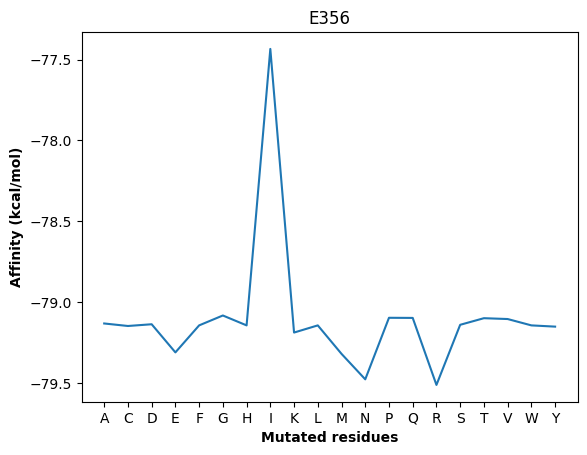

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("E356")
plt.plot(X_label, pred_356)
plt.savefig("E356.png",dpi=400)
plt.show()

In [ ]:
data_check_371 = [[371, 'L', 'A'], [371, 'L', 'C'], [371, 'L', 'D'], [371, 'L', 'E'], [371, 'L', 'F'], [371, 'L', 'G'], [371, 'L', 'H'], [371, 'L', 'I'], [371, 'L', 'K'], [371, 'L', 'L'], [371, 'L', 'M'], [371, 'L', 'N'], [371, 'L', 'P'], [371, 'L', 'Q'], [371, 'L', 'R'], [371, 'L', 'S'], [371, 'L', 'T'], [371, 'L', 'V'], [371, 'L', 'W'], [371, 'L', 'Y']]
df = pd.DataFrame(data_check_371, columns=['position', 'native_residue', 'mutated_residue'])
data_check_371_encoded = transformer.transform(df)
check_371 = data_check_371_encoded[0]

In [ ]:
pred_371 = rfr_position.predict(data_check_371_encoded)
pred_371

array([-79.59527671, -79.62075167, -79.57386025, -79.64017151,
       -79.4616402 , -79.58069835, -79.62248601, -79.62785139,
       -79.72545206, -79.65954149, -79.50925825, -79.69721235,
       -79.68174541, -79.68654611, -79.75607739, -79.62054887,
       -79.64497255, -79.64545693, -79.66362299, -79.63172951])

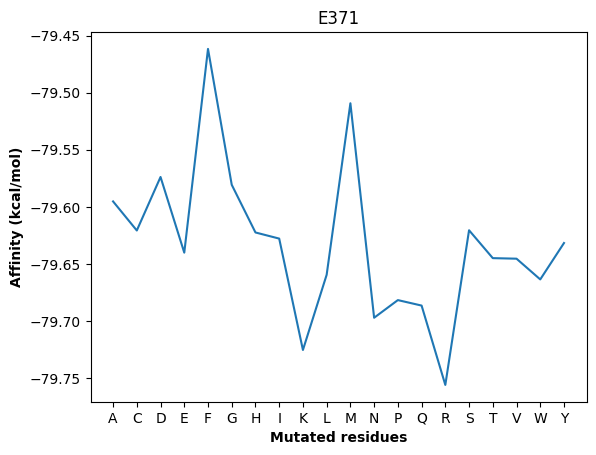

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("E371")
plt.plot(X_label, pred_371)
plt.savefig("E371.png",dpi=400)
plt.show()

In [ ]:
data_check_377 = [[377, 'F', 'A'], [377, 'F', 'C'], [377, 'F', 'D'], [377, 'F', 'E'], [377, 'F', 'F'], [377, 'F', 'G'], [377, 'F', 'H'], [377, 'F', 'I'], [377, 'F', 'K'], [377, 'F', 'L'], [377, 'F', 'M'], [377, 'F', 'N'], [377, 'F', 'P'], [377, 'F', 'Q'], [377, 'F', 'R'], [377, 'F', 'S'], [377, 'F', 'T'], [377, 'F', 'V'], [377, 'F', 'W'], [377, 'F', 'Y']]
df = pd.DataFrame(data_check_377, columns=['position', 'native_residue', 'mutated_residue'])
data_check_377_encoded = transformer.transform(df)
check_377 = data_check_377_encoded[0]

In [ ]:
pred_377 = rfr_position.predict(data_check_377_encoded)
pred_377

array([-77.22796542, -77.25330299, -77.18067792, -77.14474711,
       -77.25301737, -77.01881036, -77.25775561, -77.67400543,
       -77.26140994, -77.45684858, -77.07867147, -77.25390453,
       -77.25761203, -77.25768599, -77.28076776, -77.2035685 ,
       -77.22799086, -77.23031836, -77.25771996, -77.81921173])

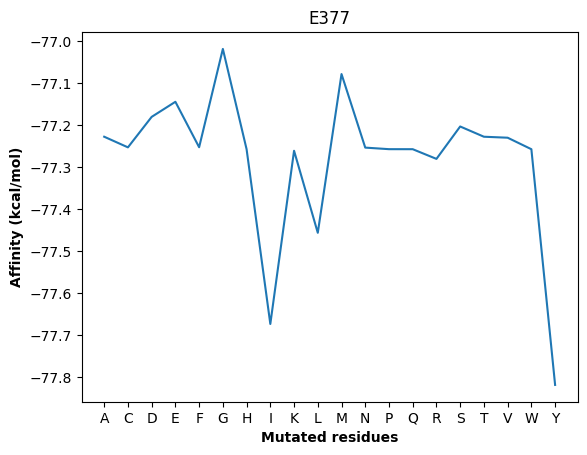

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("E377")
plt.plot(X_label, pred_377)
plt.savefig("E377.png",dpi=400)
plt.show()

In [ ]:
data_check_493 = [[493, 'R', 'A'], [493, 'R', 'C'], [493, 'R', 'D'], [493, 'R', 'E'], [493, 'R', 'F'], [493, 'R', 'G'], [493, 'R', 'H'], [493, 'R', 'I'], [493, 'R', 'K'], [493, 'R', 'L'], [493, 'R', 'M'], [493, 'R', 'N'], [493, 'R', 'P'], [493, 'R', 'Q'], [493, 'R', 'R'], [493, 'R', 'S'], [493, 'R', 'T'], [493, 'R', 'V'], [493, 'R', 'W'], [493, 'R', 'Y']]
df = pd.DataFrame(data_check_493, columns=['position', 'native_residue', 'mutated_residue'])
data_check_493_encoded = transformer.transform(df)
check_493 = data_check_493_encoded[0]

In [ ]:
pred_493 = rfr_position.predict(data_check_493_encoded)
pred_493

array([-74.28851087, -74.30355176, -74.39308267, -74.27500727,
       -74.48156651, -74.29487673, -74.30440175, -74.31813499,
       -74.27500727, -74.27535413, -74.29476041, -74.2749982 ,
       -74.30449724, -74.27497427, -74.30454773, -74.30451856,
       -74.3150017 , -74.2658354 , -74.47926403, -74.36383964])

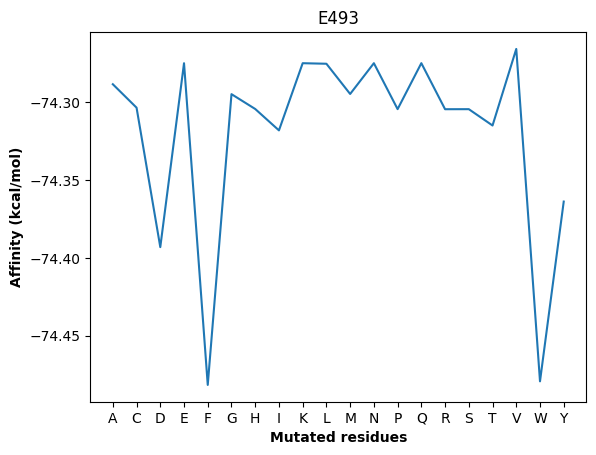

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("E493")
plt.plot(X_label, pred_493)
plt.savefig("E493.png",dpi=400)
plt.show()

In [ ]:
data_check_496 = [[496, 'G', 'A'], [496, 'G', 'C'], [496, 'G', 'D'], [496, 'G', 'E'], [496, 'G', 'F'], [496, 'G', 'G'], [496, 'G', 'H'], [496, 'G', 'I'], [496, 'G', 'K'], [496, 'G', 'L'], [496, 'G', 'M'], [496, 'G', 'N'], [496, 'G', 'P'], [496, 'G', 'Q'], [496, 'G', 'R'], [496, 'G', 'S'], [496, 'G', 'T'], [496, 'G', 'V'], [496, 'G', 'W'], [496, 'G', 'Y']]
df = pd.DataFrame(data_check_496, columns=['position', 'native_residue', 'mutated_residue'])
data_check_496_encoded = transformer.transform(df)
check_496 = data_check_496_encoded[0]

In [ ]:
pred_496 = rfr_position.predict(data_check_496_encoded)
pred_496

array([-74.32280802, -74.37499302, -74.36453598, -74.3056717 ,
       -74.42751267, -74.33909637, -74.3026686 , -74.37593818,
       -74.30419217, -74.3175955 , -74.30419541, -74.30419215,
       -74.30424026, -74.31353085, -74.33849555, -74.32132318,
       -74.32560966, -74.28274722, -74.35556737, -74.36384787])

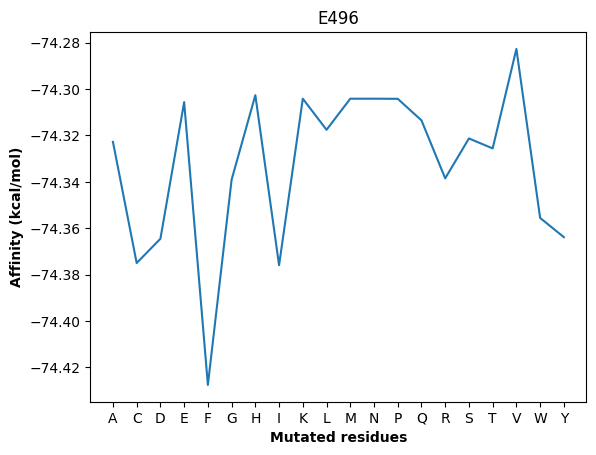

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("E496")
plt.plot(X_label, pred_496)
plt.savefig("E496.png",dpi=400)
plt.show()

In [ ]:
data_check_340 = [[340, 'E', 'A'], [340, 'E', 'C'], [340, 'E', 'D'], [340, 'E', 'E'], [340, 'E', 'F'], [340, 'E', 'G'], [340, 'E', 'H'], [340, 'E', 'I'], [340, 'E', 'K'], [340, 'E', 'L'], [340, 'E', 'M'], [340, 'E', 'N'], [340, 'E', 'P'], [340, 'E', 'Q'], [340, 'E', 'R'], [340, 'E', 'S'], [340, 'E', 'T'], [340, 'E', 'V'], [340, 'E', 'W'], [340, 'E', 'Y']]
df = pd.DataFrame(data_check_340, columns=['position', 'native_residue', 'mutated_residue'])
data_check_340_encoded = transformer.transform(df)
check_340 = data_check_340_encoded[0]

In [ ]:
pred_340 = rfr_position.predict(data_check_340_encoded)
pred_340

array([-79.29368589, -79.22832112, -79.31203163, -79.85686905,
       -79.24500301, -77.09124434, -79.35077307, -79.55410052,
       -80.86573472, -79.16873681, -79.49016035, -79.66242942,
       -78.70715574, -81.80210082, -79.39036677, -79.28351619,
       -79.34868958, -77.61776544, -79.37314556, -80.57115523])

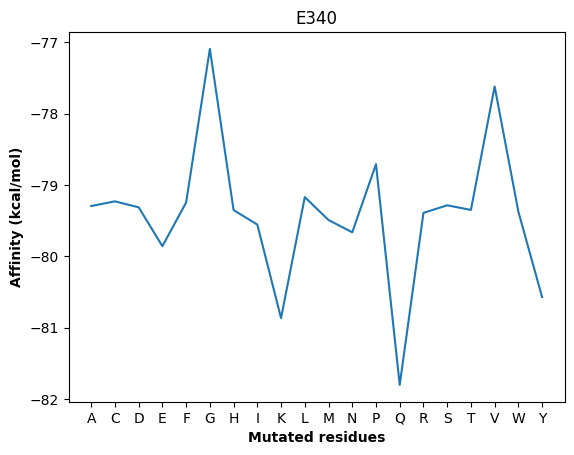

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("E340")
plt.plot(X_label, pred_340)

plt.show()

In [ ]:
data_check_508 = [[508, 'Y', 'A'], [508, 'Y', 'C'], [508, 'Y', 'D'], [508, 'Y', 'E'], [508, 'Y', 'F'], [508, 'Y', 'G'], [508, 'Y', 'H'], [508, 'Y', 'I'], [508, 'Y', 'K'], [508, 'Y', 'L'], [508, 'Y', 'M'], [508, 'Y', 'N'], [508, 'Y', 'P'], [508, 'Y', 'Q'], [508, 'Y', 'R'], [508, 'Y', 'S'], [508, 'Y', 'T'], [508, 'Y', 'V'], [508, 'Y', 'W'], [508, 'Y', 'Y']]
df = pd.DataFrame(data_check_508, columns=['position', 'native_residue', 'mutated_residue'])
data_check_508_encoded = transformer.transform(df)
check_508 = data_check_508_encoded[0]

In [ ]:
pred_508 = rfr_position.predict(data_check_508_encoded)
pred_508

array([-74.4284383 , -74.47744021, -74.43411316, -74.42039168,
       -74.56735057, -74.42039168, -74.80082141, -74.45092708,
       -74.4201696 , -74.4196206 , -74.42003968, -74.39293625,
       -74.41972221, -74.41836701, -74.42282695, -74.69020977,
       -74.4237365 , -74.40587718, -74.6276603 , -74.59778409])

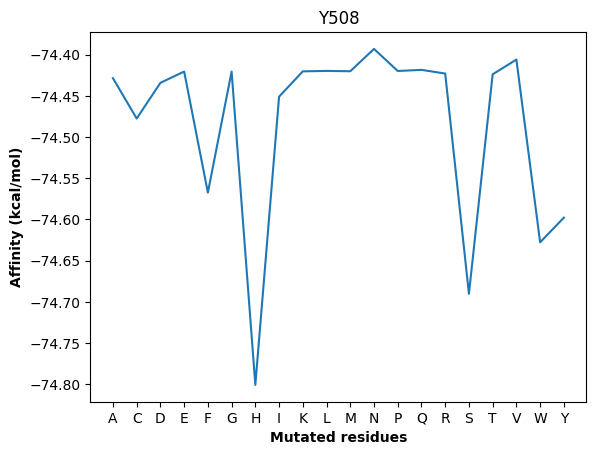

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel('Mutated residues', fontweight='bold')
plt.ylabel('Affinity (kcal/mol)', fontweight='bold')
plt.title("Y508")
plt.plot(X_label, pred_508)
plt.savefig("Y508.png",dpi=400)
plt.show()

In [ ]:
data_check_262 = [[262, 'A', 'A'], [262, 'A', 'C'], [262, 'A', 'D'], [262, 'A', 'E'], [262, 'A', 'F'], [262, 'A', 'G'], [262, 'A', 'H'], [262, 'A', 'I'], [262, 'A', 'K'], [262, 'A', 'L'], [262, 'A', 'M'], [262, 'A', 'N'], [262, 'A', 'P'], [262, 'A', 'Q'], [262, 'A', 'R'], [262, 'A', 'S'], [262, 'A', 'T'], [262, 'A', 'V'], [262, 'A', 'W'], [262, 'A', 'Y']]
df = pd.DataFrame(data_check_262, columns=['position', 'native_residue', 'mutated_residue'])
data_check_262_encoded = transformer.transform(df)
check_262 = data_check_262_encoded[0]

In [ ]:
pred_262 = rfr_position.predict(data_check_262_encoded)
pred_262

array([-79.5150103 , -79.58057522, -79.08945333, -79.86286734,
       -79.47858693, -79.02654484, -79.78140913, -79.59841324,
       -79.7198981 , -79.31689464, -79.6408154 , -79.44443388,
       -79.7679767 , -80.00469986, -79.69201982, -79.68893541,
       -79.40098397, -79.38051601, -79.77630336, -80.17549581])

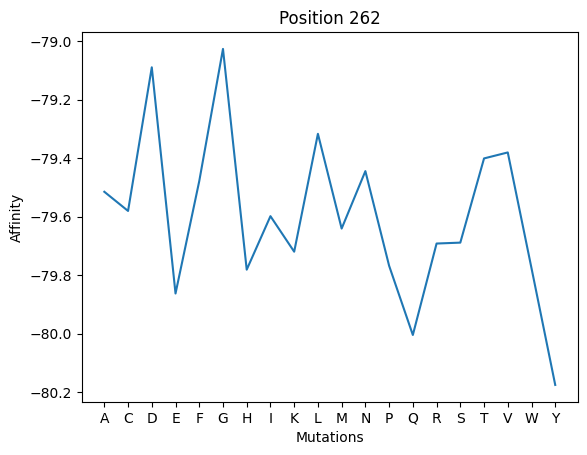

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 262")
plt.plot(X_label, pred_262)

In [ ]:
data_check_796 = [[796, 'D', 'A'], [796, 'D', 'C'], [796, 'D', 'D'], [796, 'D', 'E'], [796, 'D', 'F'], [796, 'D', 'G'], [796, 'D', 'H'], [796, 'D', 'I'], [796, 'D', 'K'], [796, 'D', 'L'], [796, 'D', 'M'], [796, 'D', 'N'], [796, 'D', 'P'], [796, 'D', 'Q'], [796, 'D', 'R'], [796, 'D', 'S'], [796, 'D', 'T'], [796, 'D', 'V'], [796, 'D', 'W'], [796, 'D', 'Y']]
df = pd.DataFrame(data_check_796, columns=['position', 'native_residue', 'mutated_residue'])
data_check_796_encoded = transformer.transform(df)
check_796 = data_check_796_encoded[0]

In [ ]:
pred_796 = rfr_position.predict(data_check_796_encoded)
pred_796

array([-77.24505555, -77.24705438, -77.26369624, -77.28466484,
       -77.28258105, -77.24809355, -77.24863987, -77.26120886,
       -77.24863987, -77.24863987, -77.26474069, -77.25071834,
       -77.24863987, -77.24863987, -77.2384584 , -77.2485663 ,
       -77.24863987, -77.24863987, -77.24848698, -77.24965708])

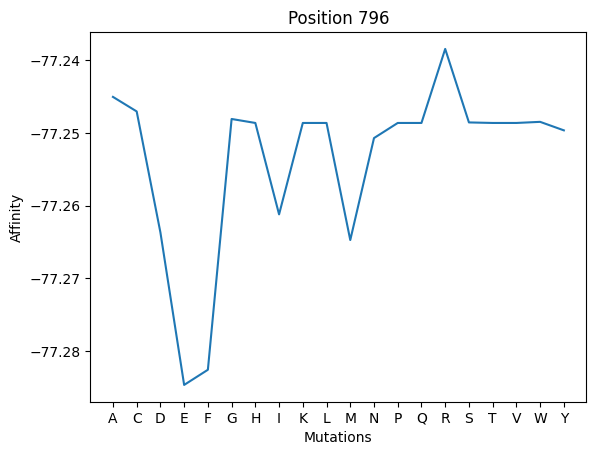

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 796")
plt.plot(X_label, pred_796)

In [ ]:
data_check_372 = [[372, 'A', 'A'], [372, 'A', 'C'], [372, 'A', 'D'], [372, 'A', 'E'], [372, 'A', 'F'], [372, 'A', 'G'], [372, 'A', 'H'], [372, 'A', 'I'], [372, 'A', 'K'], [372, 'A', 'L'], [372, 'A', 'M'], [372, 'A', 'N'], [372, 'A', 'P'], [372, 'A', 'Q'], [372, 'A', 'R'], [372, 'A', 'S'], [372, 'A', 'T'], [372, 'A', 'V'], [372, 'A', 'W'], [372, 'A', 'Y']]
df = pd.DataFrame(data_check_372, columns=['position', 'native_residue', 'mutated_residue'])
data_check_372_encoded = transformer.transform(df)
check_372 = data_check_372_encoded[0]

In [ ]:
pred_372 = rfr_position.predict(data_check_372_encoded)
pred_372

array([-73.90862224, -73.90844501, -73.90844501, -73.90844501,
       -73.90844501, -73.90844502, -73.89677176, -73.90844501,
       -73.90844501, -74.00651955, -73.90844501, -73.90844501,
       -73.89368949, -73.92394015, -73.80667361, -73.92286314,
       -73.96885151, -73.90844501, -73.90844501, -73.90844501])

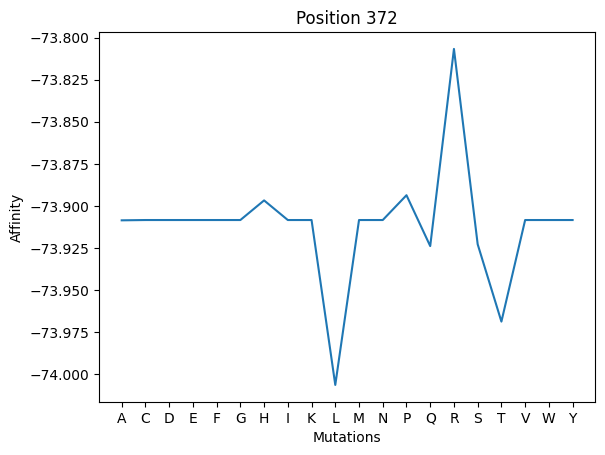

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 372")
plt.plot(X_label, pred_372)

In [ ]:
data_check_938 = [[938, 'H', 'A'], [938, 'H', 'C'], [938, 'H', 'D'], [938, 'H', 'E'], [938, 'H', 'F'], [938, 'H', 'G'], [938, 'H', 'H'], [938, 'H', 'I'], [938, 'H', 'K'], [938, 'H', 'L'], [938, 'H', 'M'], [938, 'H', 'N'], [938, 'H', 'P'], [938, 'H', 'Q'], [938, 'H', 'R'], [938, 'H', 'S'], [938, 'H', 'T'], [938, 'H', 'V'], [938, 'H', 'W'], [938, 'H', 'Y']]
df = pd.DataFrame(data_check_938, columns=['position', 'native_residue', 'mutated_residue'])
data_check_938_encoded = transformer.transform(df)
check_938 = data_check_938_encoded[0]

In [ ]:
pred_938 = rfr_position.predict(data_check_938_encoded)
pred_938

array([-77.24505555, -77.24705438, -77.26369624, -77.28466484,
       -77.28258105, -77.24809355, -77.24863987, -77.26120886,
       -77.24863987, -77.24863987, -77.26474069, -77.25071834,
       -77.24863987, -77.24863987, -77.2384584 , -77.2485663 ,
       -77.24863987, -77.24863987, -77.24848698, -77.24965708])

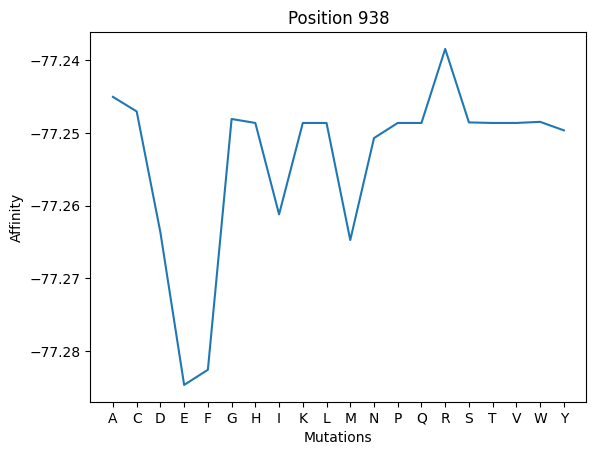

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 938")
plt.plot(X_label, pred_938)

In [ ]:
data_check_839 = [[839, 'D', 'A'], [839, 'D', 'C'], [839, 'D', 'D'], [839, 'D', 'E'], [839, 'D', 'F'], [839, 'D', 'G'], [839, 'D', 'H'], [839, 'D', 'I'], [839, 'D', 'K'], [839, 'D', 'L'], [839, 'D', 'M'], [839, 'D', 'N'], [839, 'D', 'P'], [839, 'D', 'Q'], [839, 'D', 'R'], [839, 'D', 'S'], [839, 'D', 'T'], [839, 'D', 'V'], [839, 'D', 'W'], [839, 'D', 'Y']]
df = pd.DataFrame(data_check_839, columns=['position', 'native_residue', 'mutated_residue'])
data_check_839_encoded = transformer.transform(df)
check_839 = data_check_839_encoded[0]

In [ ]:
pred_839 = rfr_position.predict(data_check_839_encoded)
pred_839

array([-77.24505555, -77.24705438, -77.26369624, -77.28466484,
       -77.28258105, -77.24809355, -77.24863987, -77.26120886,
       -77.24863987, -77.24863987, -77.26474069, -77.25071834,
       -77.24863987, -77.24863987, -77.2384584 , -77.2485663 ,
       -77.24863987, -77.24863987, -77.24848698, -77.24965708])

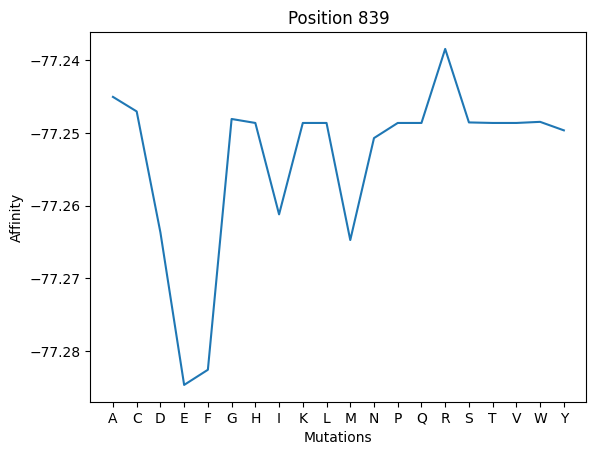

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 839")
plt.plot(X_label, pred_839)

In [ ]:
data_df = [[-79.99961441, -80.01671059, -79.99170892, -80.08204702,
       -79.96971485, -79.11424811, -79.76601381, -80.10293676,
       -80.69021419, -78.97188493, -80.11224523, -80.16852054,
       -79.30809811, -81.82092797, -80.29689655, -81.06277372,
       -80.17719529, -79.5355674 , -80.10521719, -81.14609139], [-78.52893967, -78.69761283, -78.69889097, -78.93503659,
       -78.69889097, -78.26407767, -78.65523337, -79.09553635,
       -79.22609146, -78.89416519, -78.43721027, -78.89533251,
       -77.82578758, -78.89202376, -78.74708259, -78.5953857 ,
       -78.99403713, -78.49237534, -78.95201726, -78.69889097], [-79.13215337, -79.14766786, -79.13697026, -79.31097205,
       -79.14394553, -79.08271633, -79.14394553, -77.43401969,
       -79.18827096, -79.14394553, -79.32004899, -79.4775678 ,
       -79.09695859, -79.09774539, -79.51218078, -79.14034332,
       -79.09946549, -79.1046561 , -79.14394553, -79.15161083], [-79.59527671, -79.62075167, -79.57386025, -79.64017151,
       -79.4616402 , -79.58069835, -79.62248601, -79.62785139,
       -79.72545206, -79.65954149, -79.50925825, -79.69721235,
       -79.68174541, -79.68654611, -79.75607739, -79.62054887,
       -79.64497255, -79.64545693, -79.66362299, -79.63172951], [-77.22796542, -77.25330299, -77.18067792, -77.14474711,
       -77.25301737, -77.01881036, -77.25775561, -77.67400543,
       -77.26140994, -77.45684858, -77.07867147, -77.25390453,
       -77.25761203, -77.25768599, -77.28076776, -77.2035685 ,
       -77.22799086, -77.23031836, -77.25771996, -77.81921173], [-74.28851087, -74.30355176, -74.39308267, -74.27500727,
       -74.48156651, -74.29487673, -74.30440175, -74.31813499,
       -74.27500727, -74.27535413, -74.29476041, -74.2749982 ,
       -74.30449724, -74.27497427, -74.30454773, -74.30451856,
       -74.3150017 , -74.2658354 , -74.47926403, -74.36383964], [-74.32280802, -74.37499302, -74.36453598, -74.3056717 ,
       -74.42751267, -74.33909637, -74.3026686 , -74.37593818,
       -74.30419217, -74.3175955 , -74.30419541, -74.30419215,
       -74.30424026, -74.31353085, -74.33849555, -74.32132318,
       -74.32560966, -74.28274722, -74.35556737, -74.36384787], [-79.61519782, -79.73389838, -79.71698828, -80.06233741,
       -79.63595418, -77.11608221, -79.88295869, -79.96666124,
       -80.8478071 , -79.73912764, -80.00965377, -80.00712772,
       -79.22608676, -82.12350869, -79.85153431, -79.84328439,
       -79.75926453, -78.03266508, -79.83331952, -80.88973811], [-74.4284383 , -74.47744021, -74.43411316, -74.42039168,
       -74.56735057, -74.42039168, -74.80082141, -74.45092708,
       -74.4201696 , -74.4196206 , -74.42003968, -74.39293625,
       -74.41972221, -74.41836701, -74.42282695, -74.69020977,
       -74.4237365 , -74.40587718, -74.6276603 , -74.59778409]]

In [ ]:
df_df = pd.DataFrame(data_df, columns= ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])

In [ ]:
df_df

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-79.999614,-80.016711,-79.991709,-80.082047,-79.969715,-79.114248,-79.766014,-80.102937,-80.690214,-78.971885,-80.112245,-80.168521,-79.308098,-81.820928,-80.296897,-81.062774,-80.177195,-79.535567,-80.105217,-81.146091
1,-78.528940,-78.697613,-78.698891,-78.935037,-78.698891,-78.264078,-78.655233,-79.095536,-79.226091,-78.894165,-78.437210,-78.895333,-77.825788,-78.892024,-78.747083,-78.595386,-78.994037,-78.492375,-78.952017,-78.698891
2,-79.132153,-79.147668,-79.136970,-79.310972,-79.143946,-79.082716,-79.143946,-77.434020,-79.188271,-79.143946,-79.320049,-79.477568,-79.096959,-79.097745,-79.512181,-79.140343,-79.099465,-79.104656,-79.143946,-79.151611
3,-79.595277,-79.620752,-79.573860,-79.640172,-79.461640,-79.580698,-79.622486,-79.627851,-79.725452,-79.659541,-79.509258,-79.697212,-79.681745,-79.686546,-79.756077,-79.620549,-79.644973,-79.645457,-79.663623,-79.631730
4,-77.227965,-77.253303,-77.180678,-77.144747,-77.253017,-77.018810,-77.257756,-77.674005,-77.261410,-77.456849,-77.078671,-77.253905,-77.257612,-77.257686,-77.280768,-77.203569,-77.227991,-77.230318,-77.257720,-77.819212
5,-74.288511,-74.303552,-74.393083,-74.275007,-74.481567,-74.294877,-74.304402,-74.318135,-74.275007,-74.275354,-74.294760,-74.274998,-74.304497,-74.274974,-74.304548,-74.304519,-74.315002,-74.265835,-74.479264,-74.363840
6,-74.322808,-74.374993,-74.364536,-74.305672,-74.427513,-74.339096,-74.302669,-74.375938,-74.304192,-74.317595,-74.304195,-74.304192,-74.304240,-74.313531,-74.338496,-74.321323,-74.325610,-74.282747,-74.355567,-74.363848
7,-79.615198,-79.733898,-79.716988,-80.062337,-79.635954,-77.116082,-79.882959,-79.966661,-80.847807,-79.739128,-80.009654,-80.007128,-79.226087,-82.123509,-79.851534,-79.843284,-79.759265,-78.032665,-79.833320,-80.889738
8,-74.428438,-74.477440,-74.434113,-74.420392,-74.567351,-74.420392,-74.800821,-74.450927,-74.420170,-74.419621,-74.420040,-74.392936,-74.419722,-74.418367,-74.422827,-74.690210,-74.423737,-74.405877,-74.627660,-74.597784


In [ ]:
df_df.to_excel("data.xlsx")

In [ ]:
data_df_2 = [[-77.61517 , -79.76485 , -80.45291 , -80.64689 , -80.492516,
                -78.11557 , -78.44676 , -80.56728 , -80.32405 , -77.90091 ,
                -80.51145 , -80.55542 , -78.19049 , -83.376755, -80.037895,
                -81.99001 , -80.448   , -80.42842 , -80.44987 , -81.03855 ],
            [-74.83277 , -80.09678 , -80.567276, -80.132675, -78.78197 ,
                -74.360016, -80.462776, -80.30851 , -81.89742 , -80.53298 ,
                -80.88666 , -80.639656, -80.3404  , -84.23208 , -80.70132 ,
                -80.30938 , -80.67936 , -75.020485, -80.705925, -80.85586 ],
            [-74.271576, -74.26282 , -74.26845 , -74.26254 , -74.341675,
                -74.28504 , -74.270905, -74.225235, -73.984505, -74.38829 ,
                -74.273705, -74.288994, -74.20778 , -74.263794, -74.233955,
                -74.30687 , -74.27439 , -74.289185, -74.71332 , -74.312454]]

# [[P337], [E340], [Y508]]

In [ ]:
df_df_2 = pd.DataFrame(data_df_2, columns=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])

In [ ]:
df_df_2

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-77.615170,-79.76485,-80.452910,-80.646890,-80.492516,-78.115570,-78.446760,-80.567280,-80.324050,-77.90091,-80.511450,-80.555420,-78.19049,-83.376755,-80.037895,-81.99001,-80.44800,-80.428420,-80.449870,-81.038550
1,-74.832770,-80.09678,-80.567276,-80.132675,-78.781970,-74.360016,-80.462776,-80.308510,-81.897420,-80.53298,-80.886660,-80.639656,-80.34040,-84.232080,-80.701320,-80.30938,-80.67936,-75.020485,-80.705925,-80.855860
2,-74.271576,-74.26282,-74.268450,-74.262540,-74.341675,-74.285040,-74.270905,-74.225235,-73.984505,-74.38829,-74.273705,-74.288994,-74.20778,-74.263794,-74.233955,-74.30687,-74.27439,-74.289185,-74.713320,-74.312454


In [ ]:
df_df_2.to_excel('data_2.xlsx')

In [ ]:
data_df_3 = [ [-74.851746, -76.214455, -76.07261 , -80.041435, -76.379585,
            -74.35519 , -76.38294 , -76.31724 , -77.74053 , -76.253784,
            -76.53489 , -76.50358 , -76.57263 , -76.48627 , -76.685394,
            -75.98426 , -76.44933 , -75.07786 , -76.53335 , -76.83748 ],

            [-74.29721 , -74.29152 , -74.276886, -74.29589 , -74.312675,
            -74.302704, -74.25897 , -74.19628 , -74.25563 , -74.30436 ,
            -74.30568 , -74.28957 , -74.275444, -74.28825 , -74.27832 ,
            -74.321754, -74.28951 , -74.262215, -74.45175 , -74.31584 ],

            [-76.88227 , -77.897415, -77.097885, -79.06724 , -77.95994 ,
            -77.237434, -78.47556 , -78.23526 , -78.86841 , -77.83974 ,
            -78.19676 , -78.242744, -78.19357 , -78.35824 , -78.5434  ,
            -77.46163 , -78.15231 , -78.08515 , -78.361374, -78.419365] ]

In [ ]:
df_df_3 = pd.DataFrame(data_df_3, columns=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])

In [ ]:
df_df_3

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-74.851746,-76.214455,-76.072610,-80.041435,-76.379585,-74.355190,-76.38294,-76.31724,-77.74053,-76.253784,-76.53489,-76.503580,-76.572630,-76.48627,-76.685394,-75.984260,-76.44933,-75.077860,-76.533350,-76.837480
1,-74.297210,-74.291520,-74.276886,-74.295890,-74.312675,-74.302704,-74.25897,-74.19628,-74.25563,-74.304360,-74.30568,-74.289570,-74.275444,-74.28825,-74.278320,-74.321754,-74.28951,-74.262215,-74.451750,-74.315840
2,-76.882270,-77.897415,-77.097885,-79.067240,-77.959940,-77.237434,-78.47556,-78.23526,-78.86841,-77.839740,-78.19676,-78.242744,-78.193570,-78.35824,-78.543400,-77.461630,-78.15231,-78.085150,-78.361374,-78.419365


In [ ]:
df_df_3.to_excel('data_3.xlsx')

In [ ]:
data_df_4 = [ [-74.82453 , -76.28068 , -76.10541 , -80.00981 , -76.42862 ,
       -74.35987 , -76.5968  , -76.360916, -77.71003 , -76.210236,
       -76.555   , -76.58946 , -76.64991 , -76.54954 , -76.95846 ,
       -75.92345 , -76.46837 , -75.106094, -76.602036, -76.92521 ],
[-74.28205 , -74.28671 , -74.270256, -74.275246, -74.318695,
       -74.30702 , -74.26897 , -74.22655 , -74.14271 , -74.394264,
       -74.29034 , -74.298775, -74.28042 , -74.32045 , -74.33254 ,
       -74.30279 , -74.25932 , -74.28049 , -74.45252 , -74.32509 ],
[-76.8928  , -77.87986 , -77.14084 , -79.07931 , -77.91868 ,
       -77.05601 , -78.44897 , -78.11316 , -78.94707 , -77.83574 ,
       -78.17537 , -78.25321 , -78.19436 , -78.28147 , -78.44525 ,
       -77.48576 , -78.12749 , -78.02246 , -78.37747 , -78.499435] ]

In [ ]:
df_df_4 = pd.DataFrame(data_df_4, columns=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])

In [ ]:
df_df_4

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-74.82453,-76.28068,-76.105410,-80.009810,-76.428620,-74.35987,-76.59680,-76.360916,-77.71003,-76.210236,-76.55500,-76.589460,-76.64991,-76.54954,-76.95846,-75.92345,-76.46837,-75.106094,-76.602036,-76.925210
1,-74.28205,-74.28671,-74.270256,-74.275246,-74.318695,-74.30702,-74.26897,-74.226550,-74.14271,-74.394264,-74.29034,-74.298775,-74.28042,-74.32045,-74.33254,-74.30279,-74.25932,-74.280490,-74.452520,-74.325090
2,-76.89280,-77.87986,-77.140840,-79.079310,-77.918680,-77.05601,-78.44897,-78.113160,-78.94707,-77.835740,-78.17537,-78.253210,-78.19436,-78.28147,-78.44525,-77.48576,-78.12749,-78.022460,-78.377470,-78.499435


In [ ]:
df_df_4.to_excel('data_4.xlsx')

**Stability**

In [ ]:
X_train_stability = X_train[:,[38]]
X_test_stability = X_test[:,[38]]

In [ ]:
lr_stabilty = LinearRegression()
lr_stabilty.fit(X_train_stability, y_train)
lr_stabilty.score(X_test_stability, y_test)

0.4590282771365354

In [ ]:
svr_stability = SVR(kernel = "rbf")
svr_stability.fit(X_train_stability, y_train)
svr_stability.score(X_test_stability, y_test)

0.7040395148972682

In [ ]:
dtr_stability = DecisionTreeRegressor()
dtr_stability.fit(X_train_stability, y_train)
dtr_stability.score(X_test_stability, y_test)

0.707280147872533

In [ ]:
rfr_stability = RandomForestRegressor(random_state = 0)
rfr_stability.fit(X_train_stability, y_train)
rfr_stability.score(X_test_stability, y_test)

0.7632857631096788

In [ ]:
pred_stability = rfr_stability.predict(X_test_stability)

The parameters of the line: [ 0.92966272 -5.43239089]


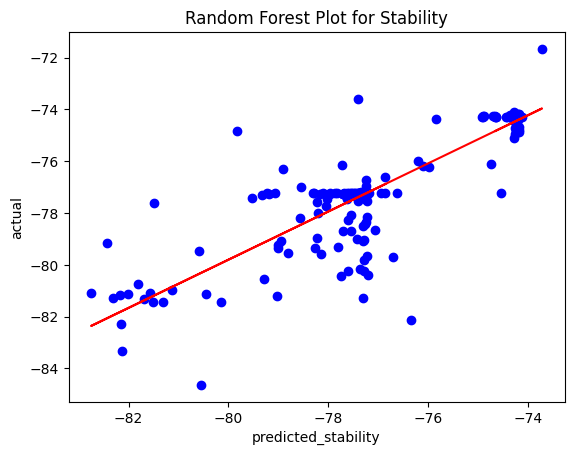

In [ ]:
theta_2 = np.polyfit(pred_stability, y_test, 1)
print(f'The parameters of the line: {theta_2}')
y_line_stability = theta_2[1] + theta_2[0] * pred_stability
plt.scatter(pred_stability, y_test, color="blue")
plt.plot(pred_stability, y_line_stability, 'r')
plt.title('Random Forest Plot for Stability')
plt.xlabel('predicted_stability')
plt.ylabel('actual')

plt.show()

**dStability**

In [ ]:
X_train_dStability = X_train[:,[39]]
X_test_dStability = X_test[:,[39]]

In [ ]:
lr_dStabilty = LinearRegression()
lr_dStabilty.fit(X_train_dStability, y_train)
lr_dStabilty.score(X_test_dStability, y_test)

0.008290601896927208

In [ ]:
svr_dStability = SVR(kernel = "rbf")
svr_dStability.fit(X_train_dStability, y_train)
svr_dStability.score(X_test_dStability, y_test)

-0.04124695941141532

In [ ]:
dtr_dStability = DecisionTreeRegressor()
dtr_dStability.fit(X_train_dStability, y_train)
dtr_dStability.score(X_test_dStability, y_test)

-0.9504566917648127

In [ ]:
rfr_dStability = RandomForestRegressor(random_state = 0)
rfr_dStability.fit(X_train_dStability, y_train)
rfr_dStability.score(X_test_dStability, y_test)

-0.44981263872771615

In [ ]:
pred_dStability = rfr_dStability.predict(X_test_dStability)

Text(0.5, 1.0, 'Random Forest Plot for dStability')

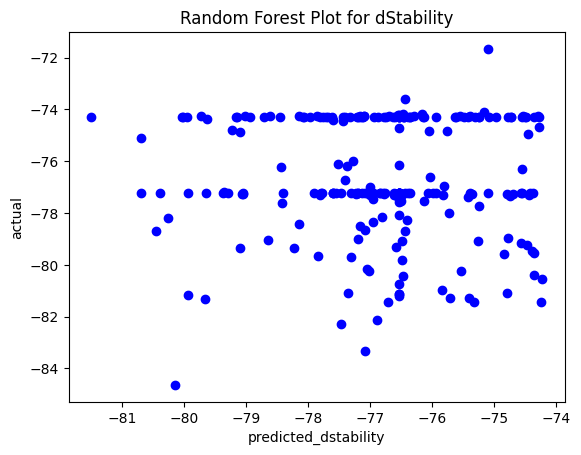

In [ ]:
plt.scatter(pred_dStability, y_test, color = 'blue')
plt.xlabel('predicted_dstability')
plt.ylabel('actual')
plt.title('Random Forest Plot for dStability')

**dAffinity**

In [ ]:
X_train_dAffinity = X_train[:,[37]]
X_test_dAffinity = X_test[:,[37]]

In [ ]:
lr_dAffinity = LinearRegression()
lr_dAffinity.fit(X_train_dAffinity, y_train)
lr_dAffinity.score(X_test_dAffinity, y_test)

-0.0139471022943094

In [ ]:
svr_dAffinity = SVR(kernel = "rbf")
svr_dAffinity.fit(X_train_dAffinity, y_train)
svr_dAffinity.score(X_test_dAffinity, y_test)

0.04365244325075601

In [ ]:
dtr_dAffinity = DecisionTreeRegressor()
dtr_dAffinity.fit(X_train_dAffinity, y_train)
dtr_dAffinity.score(X_test_dAffinity, y_test)

-0.03978570978951024

In [ ]:
rfr_dAffinity = RandomForestRegressor(random_state = 0)
rfr_dAffinity.fit(X_train_dAffinity, y_train)
rfr_dAffinity.score(X_test_dAffinity, y_test)

0.14463077182911388

In [ ]:
pred_dAffinity = rfr_dAffinity.predict(X_test_dAffinity)

Text(0.5, 1.0, 'Random Forest Plot for dAffinity')

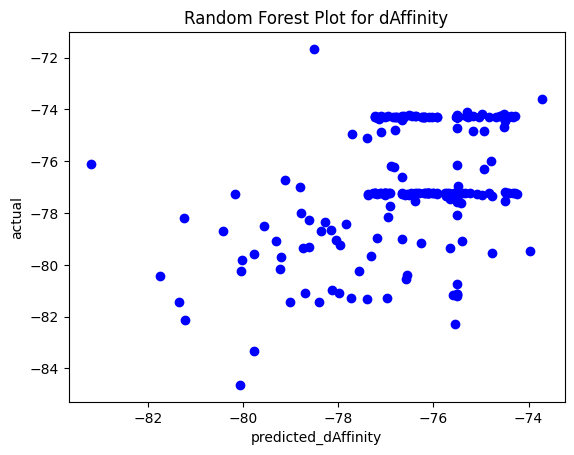

In [ ]:
plt.scatter(pred_dAffinity, y_test, color = 'blue')
plt.xlabel('predicted_dAffinity')
plt.ylabel('actual')
plt.title('Random Forest Plot for dAffinity')